<a href="https://colab.research.google.com/github/marcospaulofg/Data-Science/blob/main/An%C3%A1lise%20de%20Dados%20e%20Boas%20Pr%C3%A1ticas/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

# 1️⃣ Definição do problema
___

## 1.1 - Dataset

O dataset deste MVP será um conjunto de dados públicos de e-commerce brasileiro com pedidos feitos na Olist Store, a maior loja de departamentos do marketplace brasileiro. O conjunto de dados contém informações de aproximadamente 100 mil pedidos de 2016 a 2018, feitos em diversos marketplaces no Brasil.

## 1.2 - Descrição do problema

Visto que um dos principais desafios de qualquer comércio é garantir a satisfação do cliente, este projeto visa analisar os fatores que influenciam essa satisfação em compras online.

O problema central será preparar os dados para futuramente construir um modelo capaz de prever se um cliente ficará satisfeito (dando uma nota de avaliação alta) ou insatisfeito (dando uma nota baixa) com base nas características do seu pedido.

## 1.3 - Tipo de problema

Este é um problema de aprendizado supervisionado de classificação.

Supervisionado porque temos labels nos dados, que são as notas dadas pelos clientes, e classificação porque a variável alvo será transformada em categorias discretas (por exemplo, "satisfeito", "insatisfeito", "indiferente", etc).

## 1.4 - Hipóteses do problema

1. O tempo de entrega é o fator mais crítico para a satisfação do cliente. Entregas que ultrapassam a data estimada geram avaliações negativas.

2. O valor do frete, especialmente quando comparado ao valor do produto, influencia a percepção de valor e, consequentemente, a satisfação.

3. Certas categorias de produtos (ex: produtos considerados frágeis, eletrônicos) podem ser mais propensas a problemas e, portanto, a avaliações piores.

4. A relação entre o preço pago pelo produto e sua qualidade é diretamente proporcional. Se um produto for muito caro, mas não apresentar a qualidade condizente, pode gerar insatisfação. Porém um produto de baixa qualidade, mas que seja barato, pode não gerar tanta insatisfação, pois a falta de qualidade já seria esperada.

## 1.5 - Condições impostas para selecionar os dados

A análise está restrita aos dados coletados e disponibilizados pela Olist, cobrindo o período de setembro de 2016 a agosto de 2018. Não temos acesso informações sobre a comunicação entre cliente e vendedor, o que poderia ajudar a avaliar ainda mais os motivos de insatisfação.

## 1.6 - Atributos do dataset

Este dataset está dividido em 9 arquivos `.csv` que se relacionam. São eles:

- `olist_orders_dataset.csv`: Contém a informação central de cada pedido.
  - `order_id`: Identificador único do pedido.  
  - `customer_id`: Identificador único do cliente.  
  - `order_status`: Status do pedido (delivered, shipped, etc.).  
  - `order_purchase_timestamp`: Data e hora da compra.  
  - `order_approved_at`: Data e hora da aprovação do pagamento.  
  - `order_delivered_carrier_date`: Data e hora do envio à transportadora.  
  - `order_delivered_customer_date`: Data da entrega ao cliente.  
  - `order_estimated_delivery_date`: Data estimada da entrega.

- `olist_order_items_dataset.csv`: Contém os itens de cada pedido.  
  - `order_id`: Chave para conectar com a tabela de pedidos.  
  - `order_item_id`: Número sequencial que identifica o número de itens incluídos no mesmo pedido.  
  - `product_id`: Identificador do produto.  
  - `seller_id`: Identificador do vendedor.  
  - `shipping_limit_date`: Data limite de envio do vendedor.
  - `price`: Preço do produto.  
  - `freight_value`: Valor do frete (se um pedido tiver mais de um item o valor do frete será dividido entre os itens).  

- `olist_order_reviews_dataset.csv`: Contém as avaliações dos pedidos.  
  - `review_id`: Identificador único da avaliação.  
  - `order_id`: Chave para conectar com a tabela de pedidos.  
  - `review_score`: Nossa variável-alvo com notas de 1 a 5.  
  - `review_comment_title`: Título do comentário da avaliação deixada pelo cliente.  
  - `review_comment_message`: Mensagem de comentário da avaliação deixada pelo cliente.  
  - `review_creation_date`: Data em que a pesquisa de satisfação foi enviada ao cliente.  
  - `review_answer_timestamp`: Data e hora da resposta da pesquisa de satisfação.  

- `olist_products_dataset.csv`: Contém informações sobre os produtos.  
  - `product_id`: Chave para conectar com a tabela de itens.  
  - `product_category_name`: Categoria do produto.
  - `product_name_lenght`: Número de caracteres do nome do produto.  
  - `product_description_lenght`: Número de caracteres da descrição do produto.  
  - `product_photos_qty`: Número de fotos de produtos publicadas.  
  - `product_weight_g`: Peso do produto em gramas.  
  - `product_length_cm`: Comprimento do produto em centímetros.  
  - `product_height_cm`: Altura do produto em centímetros.  
  - `product_width_cm`: Largura do produto em centímetros.

- `olist_customers_dataset.csv`: Contém informações sobre clientes.
  - `customer_id`: Chave para conectar com a tabela de pedidos. Cada pedido possui um customer_id exclusivo.  
  - `customer_unique_id`: Identificador único do cliente.  
  - `customer_zip_code_prefix`: Primeiros cinco dígitos do CEP do cliente.  
  - `customer_city`: Cidade do cliente.  
  - `customer_state`: Estado do cliente.

- `olist_order_payments_dataset.csv`: Contém informações sobre pagamentos.
  - `order_id`: Identificador único do pedido.  
  - `payment_sequential`: Um cliente pode pagar um pedido com mais de um método de pagamento. Se o fizer, será criada uma sequência para acomodar todos os pagamentos.  
  - `payment_type`: Forma de pagamento.  
  - `payment_installments`: Número de parcelas.  
  - `payment_value`: Valor pago.  

Outras tabelas incluem dados de vendedores (`olist_sellers_dataset.csv`), tradução de nomes das categorias (`product_category_name_translation.csv`) e localizações geográficas (`olist_geolocation_dataset.csv`), porém essas não serão usadas em nossa análise. Também não utilizaremos todas as colunas, portanto mais adiante iremos removê-las após analisar quais são descartáveis para nosso projeto.

Segue um esquema fornecido pela própria Olist para identificação das relações entre as tabelas.

![Alt text](https://i.imgur.com/HRhd2Y0.png "a title")

# 2️⃣ Análise de dados
___

Vamos inicar o projeto entendendo as informações disponíveis no dataset. Para isso, faremos algumas análises básicas e estatísticas como:

- Quantos atributos e instâncias existem;
- Quais são os tipos de dados dos atributos;
- O que chama atenção ao verificar as primeiras linhas do dataset;
- Verificar valores nulos, duplicados, outliers ou inconsistentes;
- Resumo estatístico dos atributos numéricos (mínimo, máximo, mediana, média, desvio-padrão, primeiro quartil, terceiro quartil e moda).

- Visualizações:
  - Verificar a distribuição dos atributo com histogramas e gráficos de contagem;
  - Analisar a relação entre as variáveis preditoras e variável alvo com boxplots;
  - Verificar a correlação entre todas as variáveis com a matriz de correlação.

## 2.1 - Imports necessários

In [28]:
import kagglehub  # para baixar o dataset do kaggle
import os  # para manipular os arquivos do SO
import pandas as pd  # para criar e manipular os dados em forma de tabelas/dataframes
import numpy as np  # para criar e manipular dados numéricos
import matplotlib.pyplot as plt  # para criar gráficos
from matplotlib.patches import Patch  # para auxiliar a criação de gráficos
import seaborn as sns  # para criar gráficos
import warnings  # para ignorar os warnings
warnings.filterwarnings("ignore")  # para ignorar os warnings
from sklearn.model_selection import train_test_split  # para dividir os dados em conjuntos de treino e teste
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # para fazer a padronização dos dados
from sklearn.compose import ColumnTransformer  # para aplicar transformações diferentes nas colunas do dataset
from imblearn.over_sampling import SMOTE  # para tratar o desbalanceamento dos dados com oversampling

## 2.2 - Carga de dados

In [29]:
# Download do dataset no Kaggle
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

# Lista os arquivos na pasta
os.listdir(path)

['olist_customers_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_products_dataset.csv',
 'olist_geolocation_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_payments_dataset.csv']

In [30]:
# Carregando os datasets
df_customers = pd.read_csv(path + '/olist_customers_dataset.csv')
df_items = pd.read_csv(path + '/olist_order_items_dataset.csv')
df_payments = pd.read_csv(path + '/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv(path + '/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv(path + '/olist_orders_dataset.csv')
df_products = pd.read_csv(path + '/olist_products_dataset.csv')

Primeiro iremos juntar os dataframes em um dataframe único, a fim de facilitar a análise.

In [31]:
# Juntando as tabelas em uma tabela única
df_full = pd.merge(df_orders, df_reviews, on='order_id', how='left')
df_full = pd.merge(df_full, df_customers, on='customer_id', how='left')
df_full = pd.merge(df_full, df_items, on='order_id', how='left')
df_full = pd.merge(df_full, df_products, on='product_id', how='left')
df_full = pd.merge(df_full, df_payments, on='order_id', how='left')

Agora iremos deletar algumas colunas para falicitar o manuseio dos dados. Após a leitura da descrição de cada coluna do dataset na seção 1.6, decidimos ficar apenas com as colunas selecionadas abaixo.

In [32]:
df = df_full[['order_id',
         'order_item_id',
         'order_status',
         'order_purchase_timestamp',
         'order_delivered_customer_date',
         'order_estimated_delivery_date',
         'review_score',
         'customer_state',
         'price',
         'freight_value',
         'product_category_name',
         'payment_sequential',
         'payment_value']].copy()

## 2.3 - Engenharia de atributos

Também iremos realizar um pequeno processo de feature engineering prévio, transformando colunas de data para o tipo `datetime` e criando duas colunas `delivery_time` (`order_delivered_customer_date` - `order_purchase_timestamp`) e `delivery_days` para analisarmos o tempo de entrega de cada pedido.

In [33]:
# Transformando colunas de data em datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Criando colunas de tempo de entrega
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['delivery_days'] = df['delivery_time'].dt.days

## 2.4 - Exploração inicial dos dados

### 2.4.1 - Total de instâncias e atributos

In [34]:
print(f"Total de instâncias: {df.shape[0]}")
print(f"Total de atributos: {df.shape[1]}")

Total de instâncias: 119143
Total de atributos: 15


### 2.4.2 - Tipos de dados dos atributos

In [35]:
print("Tipos de dados: \n")
df.dtypes

Tipos de dados: 



,0
order_id,object
order_item_id,float64
order_status,object
order_purchase_timestamp,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]
review_score,float64
customer_state,object
price,float64
freight_value,float64


Uma pequena parte do dataset é composta por strings (tipo `object`), que se resumem a ID's, status do pedido, estado do cliente e categoria do produto; enquanto as colunas numéricas (tipo `float`) são as relacionadas a nota de avaliação do pedido, valores de produtos e frete, valor de pagamento e dias para entrega. Temos também três campos do tipo `datetime` e um campo de `timedelta`, que é a diferença entre dois campos de data.

### 2.4.3 - Verificando as primeiras linhas do dataset

In [36]:
print("Primeiras 10 linhas do dataset: \n")
df.head(10)

Primeiras 10 linhas do dataset: 



,order_id,order_item_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_state,price,freight_value,product_category_name,payment_sequential,payment_value,delivery_time,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0,SP,29.99,8.72,utilidades_domesticas,1.0,18.12,8 days 10:28:40,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,1.0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0,SP,29.99,8.72,utilidades_domesticas,3.0,2.00,8 days 10:28:40,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,1.0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0,SP,29.99,8.72,utilidades_domesticas,2.0,18.59,8 days 10:28:40,8.0
3,53cdb2fc8bc7dce0b6741e2150273451,1.0,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,4.0,BA,118.70,22.76,perfumaria,1.0,141.46,13 days 18:46:08,13.0
4,47770eb9100c2d0c44946d9cf07ec65d,1.0,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,5.0,GO,159.90,19.22,automotivo,1.0,179.12,9 days 09:27:40,9.0
5,949d5b44dbf5de918fe9c16f97b45f8a,1.0,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,5.0,RN,45.00,27.20,pet_shop,1.0,72.20,13 days 05:00:36,13.0
6,ad21c59c0840e6cb83a9ceb5573f8159,1.0,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,5.0,SP,19.90,8.72,papelaria,1.0,28.62,2 days 20:58:23,2.0
7,a4591c265e18cb1dcee52889e2d8acc3,1.0,delivered,2017-07-09 21:57:05,2017-07-26 10:57:55,2017-08-01,4.0,PR,147.90,27.36,automotivo,1.0,175.26,16 days 13:00:50,16.0
8,136cce7faa42fdb2cefd53fdc79a6098,1.0,invoiced,2017-04-11 12:22:08,NaT,2017-05-09,2.0,RS,49.90,16.05,NaN,1.0,65.95,NaT,NaN
9,6514b8ad8028c9f2cc2374ded245783f,1.0,delivered,2017-05-16 13:10:30,2017-05-26 12:55:51,2017-06-07,5.0,RJ,59.99,15.17,automotivo,1.0,75.16,9 days 23:45:21,9.0


Olhando para as primeiras linhas do dataset, vemos que na linha de índice 8 temos um registro com valores nulos na coluna de `order_delivered_customer_date`, ou seja, provavelmente esse pedido não foi entregue. Vamos verificar se existem valores nulos para outras colunas também.

### 2.4.4 - Verificando valores nulos

In [37]:
print("Valores nulos por coluna:")
df.isna().sum()

Valores nulos por coluna:


,0
order_id,0
order_item_id,833
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,3421
order_estimated_delivery_date,0
review_score,997
customer_state,0
price,833
freight_value,833


Existem diversas colunas com valores nulos, e iremos tratá-los na etapa de pré-processamento dos dados.  
Por ora, vamos continuar com nossa exploração dos dados.

### 2.4.5 - Verificando registros duplicados

In [38]:
print(f"Total de registros duplicados: {df.duplicated().sum()}")

Total de registros duplicados: 421


Verificamos 421 registros duplicados, portanto vamos analisar o que houve com esses registros.  
Como removemos algumas linhas, precisamos saber se no dataset original essas linhas também estavam duplicadas, pois os dados que tornavam esses registros únicos podem ter sido deletados.

In [39]:
print(f"Total de registros duplicados: {df_full.duplicated().sum()}")

Total de registros duplicados: 0


Aqui vemos que no dataset completo não há registros em duplicidade, portanto a suspeita de remoção dos dados que os tornam únicos foi confirmada. Vamos analisar alguns deles.

In [40]:
# Verificando apenas os registros duplicados
df[df.duplicated()].head(10)

,order_id,order_item_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_state,price,freight_value,product_category_name,payment_sequential,payment_value,delivery_time,delivery_days
481,ac7a92560a9e99f0a0ab4988102f491b,1.0,delivered,2018-03-04 15:58:09,2018-03-22 23:44:33,2018-03-23,1.0,PR,89.99,17.88,cama_mesa_banho,1.0,107.87,18 days 07:46:24,18.0
660,7845a2492ab1b4f2cf3d56c7b8da1446,1.0,delivered,2018-01-18 12:35:45,2018-01-23 21:51:48,2018-02-09,5.0,PR,29.99,14.10,moveis_decoracao,1.0,44.09,5 days 09:16:03,5.0
738,714fb133a6730ab81fa1d3c1b2007291,1.0,canceled,2018-01-26 21:34:08,NaT,2018-02-22,1.0,SP,69.90,26.11,moveis_decoracao,1.0,96.01,NaT,NaN
803,acbe07f22f29ad7e5a78f30008cc6ec7,1.0,delivered,2017-11-18 14:33:04,2017-11-29 17:58:43,2017-12-05,5.0,SP,19.30,11.73,bebidas,1.0,124.12,11 days 03:25:39,11.0
804,acbe07f22f29ad7e5a78f30008cc6ec7,2.0,delivered,2017-11-18 14:33:04,2017-11-29 17:58:43,2017-12-05,5.0,SP,19.30,11.73,bebidas,1.0,124.12,11 days 03:25:39,11.0
805,acbe07f22f29ad7e5a78f30008cc6ec7,3.0,delivered,2017-11-18 14:33:04,2017-11-29 17:58:43,2017-12-05,5.0,SP,19.30,11.73,bebidas,1.0,124.12,11 days 03:25:39,11.0
806,acbe07f22f29ad7e5a78f30008cc6ec7,4.0,delivered,2017-11-18 14:33:04,2017-11-29 17:58:43,2017-12-05,5.0,SP,19.30,11.73,bebidas,1.0,124.12,11 days 03:25:39,11.0
1317,5e4c365dd3cf7769a88981f408d069d3,1.0,delivered,2017-11-21 21:31:09,2017-12-23 16:13:34,2017-12-12,1.0,RJ,89.99,17.88,cama_mesa_banho,1.0,107.87,31 days 18:42:25,31.0
1963,6596197a74edd396e3d34c53eff4ad6f,1.0,delivered,2018-02-07 20:18:57,2018-02-15 15:38:45,2018-03-05,5.0,SP,325.00,13.77,beleza_saude,1.0,338.77,7 days 19:19:48,7.0
2518,8f32ee82ea0fe678bd4aae681f1637cc,1.0,delivered,2017-06-25 16:16:00,2017-06-28 16:16:52,2017-07-07,5.0,SP,229.99,14.16,cool_stuff,1.0,244.15,3 days 00:00:52,3.0


In [41]:
# Criando função para comparar apenas as colunas que possuem dados diferentes entre elas

def comparar_diferencas(df, order_id, order_item_id):
  linhas = df[(df['order_id'] == order_id) & (df['order_item_id'] == order_item_id)]

  # Comparando as duas linhas para encontrar as diferenças
  diferencas = linhas.iloc[0] != linhas.iloc[1]

  # Mostrando apenas as colunas com valores diferentes
  colunas_diferentes = linhas.columns[diferencas]

  # Exibindo as colunas com valores diferentes
  return linhas[colunas_diferentes].T

In [42]:
comparar_diferencas(df_full, 'ac7a92560a9e99f0a0ab4988102f491b', 1)

,480,481
review_id,1ce9388b1a3ad76f5f1a64f208a90fce,5ac791169055b4994a395a442e3956f6
review_comment_title,NaN,NaN
review_comment_message,O prazo era até dia 23/03 e até o momento não ...,"Comprei pensando que ia vir conforme a foto, v..."
review_creation_date,2018-03-25 00:00:00,2018-03-23 00:00:00
review_answer_timestamp,2018-03-25 21:40:11,2018-03-24 12:57:14


In [43]:
comparar_diferencas(df_full, 'acbe07f22f29ad7e5a78f30008cc6ec7', 4)

,802,806
review_id,ea1fbd19c48a016b08c92aa1daf658de,a3c3bd7b9583c15aa8b72bbb94e8744d
review_comment_title,NaN,NaN
review_comment_message,NaN,NaN
review_creation_date,2017-11-30 00:00:00,2017-11-25 00:00:00
review_answer_timestamp,2017-12-01 10:27:29,2017-11-25 21:21:54


In [44]:
comparar_diferencas(df_full, '6d58638e32674bebee793a47ac4cbadc', 1)

,94372,94373,94374,94375,94376,94377,94378,94379,94380,94381,...,94386,94387,94388,94389,94390,94391,94392,94393,94394,94395
review_comment_title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,7.0,12.0,1.0,4.0,5.0,9.0,6.0,3.0,8.0,2.0,...,1.0,4.0,5.0,9.0,6.0,3.0,8.0,2.0,10.0,11.0
payment_value,10.45,13.53,12.53,2.51,2.24,10.45,15.67,2.87,15.67,1.03,...,12.53,2.51,2.24,10.45,15.67,2.87,15.67,1.03,10.45,10.45


Com essa análise podemos ver que esses registros na verdade estão duplicados pois o cliente fez mais de uma avaliação para o mesmo pedido, portanto quando realizamos o `merge` dos datasets, o registos do pedido foi duplicado para que obtivessemos as informações das duas ou mais avaliações.  
Vamos remover esses registros duplicados na etapa de pré-processamento dos dados.

## 2.5 - Estatísticas descritivas

In [45]:
df.describe()[['review_score',
               'price',
               'freight_value',
               'payment_value',
               'delivery_days']]

,review_score,price,freight_value,payment_value,delivery_days
count,118146.000000,118310.000000,118310.000000,119140.000000,115722.000000
mean,4.015582,120.646603,20.032387,172.735135,12.022589
min,1.000000,0.850000,0.000000,0.000000,0.000000
25%,4.000000,39.900000,13.080000,60.850000,6.000000
50%,5.000000,74.900000,16.280000,108.160000,10.000000
75%,5.000000,134.900000,21.180000,189.240000,15.000000
max,5.000000,6735.000000,409.680000,13664.080000,209.000000
std,1.400436,184.109691,15.836850,267.776077,9.454922


Analisando o `review_score` vemos que a média é 4.01, indicando que a maioria dos clientes tende a dar notas altas.  
O desvio padrão é de 1.40, o que pode ser considerado alto comparado com a média. Evidenciamos isso usando o coeficiente de variação (CV), que é `CV = (std / mean) * 100`, resultando em um valor de 34,91%, o que nos indica um desvio padrão alto, ou seja, os dados estão muito espalhados e distantes da média.  
Valores min = 1 e max = 5 estão dentro do esperado.  
Um ponto interessante é que a mediana é 5, nos mostrando que pelo menos 50% das notas é 5 estrelas! Enquanto o primeiro quartil é 4. Ou seja, as notas 1, 2 e 3 juntas são no máximo 25% das avaliações. Essa análise nos mostra que os dados para avaliação de notas é extremamente desbalanceado, o que pode causar problemas na fase de modelagem.  
Uma solução seria utilizar técnicas de oversampling, como SMOTE, ou undersampling.

Para as variáveis `price`, `freight_value`, `payment_value` e `delivery_days` possuem comportamentos semelhantes. Em todos eles a média é bem maior que a mediana e a diferença entre os valores mínimos e a mediana e muito alta quando comparado com a diferença entre os valores máximos e mediana. Teremos gráficos com uma distribuição assimétrica à direita em todos eles.





## 2.6 - Visualizações

### 2.6.1 - Gráficos de contagem, histogramas e KDE

Vamos visualizar a distibuição da variável `review_score`.

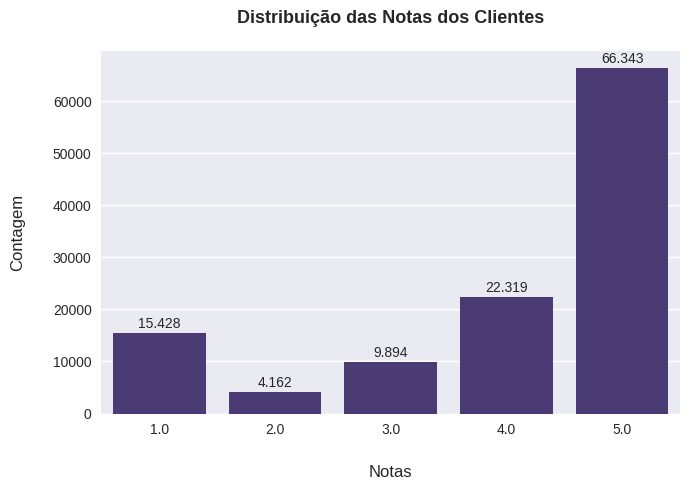

In [414]:
# Cria o gráfico
plt.figure(figsize=(7, 5))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

ax = sns.countplot(data=df, x='review_score', hue=True, legend=False)

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1000,
        s='{:,}'.format(int(height)).replace(',', '.'),
        ha='center'
    )

# Títulos e rótulos
plt.title('Distribuição das Notas dos Clientes', fontweight='bold', fontsize=13, pad=20)
plt.xlabel('Notas', fontsize=12, labelpad=20)
plt.ylabel('Contagem', fontsize=12, labelpad=20)
plt.tight_layout()
plt.show()

Com esse gráfico vemos que não temos notas com valores "quebrados", por exemplo 1.5, temos apenas números inteiros: 1, 2, 3, 4 e 5. Confirmamos que os valores estão totalmente concentrados em notas 5.

Agora vamos visualizar a variável `product_category_name`.

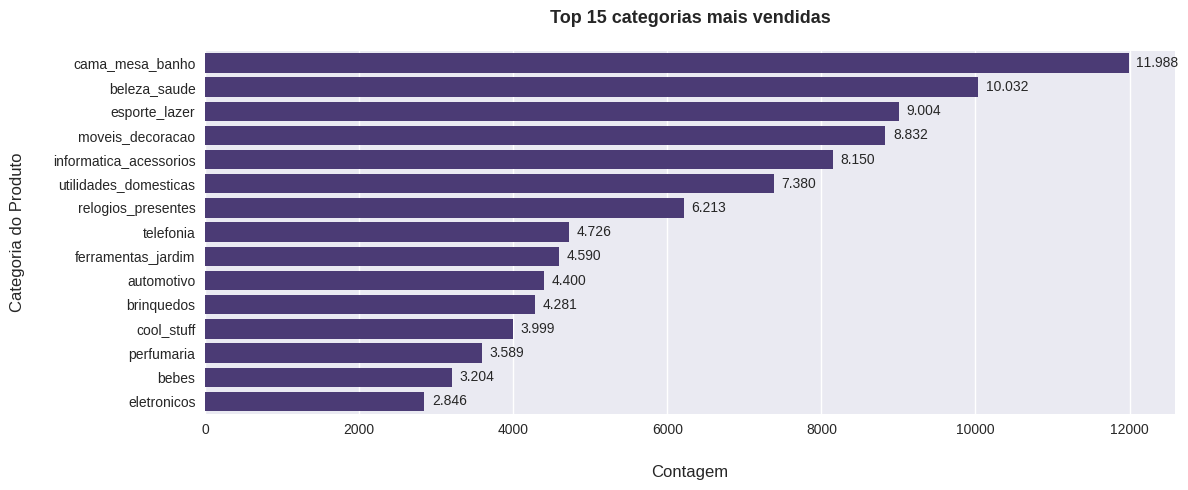

In [411]:
# Fazendo um top15 das categorias mais vendidas
top_15 = df['product_category_name'].value_counts().nlargest(15)

# Criand o gráfico
plt.figure(figsize=(12, 5))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

ax = sns.countplot(data=df, y='product_category_name', order=top_15.index)

# Adicionar os valores no final de cada barra
for i, category in enumerate(top_15.index):
    count = top_15[category]
    ax.text(
        x=count + 100,
        y=i,
        s='{:,}'.format(int(count)).replace(',', '.'),
        va='center'
    )

# Legendas e ajuste de layout
plt.title('Top 15 categorias mais vendidas', fontweight='bold', fontsize=13, pad=20)
plt.xlabel('Contagem', fontsize=12, labelpad=20)
plt.ylabel('Categoria do Produto', fontsize=12, labelpad=20)

plt.tight_layout()
plt.show()

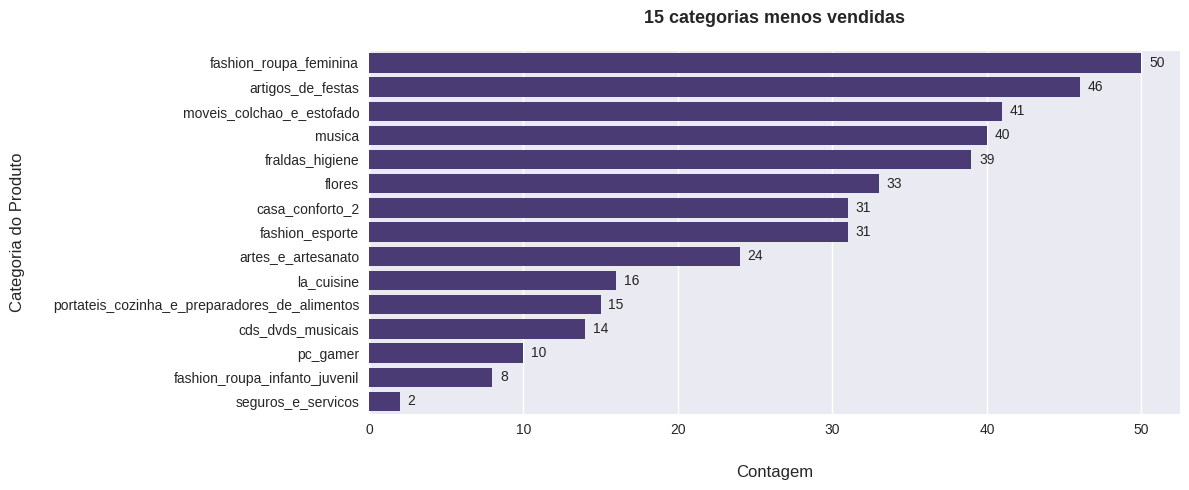

In [410]:
# Pegando as 15 categorias menos vendidas
bottom_15 = df['product_category_name'].value_counts().nsmallest(15)

# Criando o gráfico
plt.figure(figsize=(12, 5))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

ax = sns.countplot(data=df, y='product_category_name', order= bottom_15[::-1].index)

# Adicionar os valores no final de cada barra
for i, category in enumerate(bottom_15[::-1].index):
    count = bottom_15[::-1][category]
    ax.text(
        x=count + 0.5,
        y=i,
        s=str(int(count)),
        va='center'
    )

# Legendas e ajuste de layout
plt.title('15 categorias menos vendidas', fontweight='bold', fontsize=13, pad=20)
plt.xlabel('Contagem', fontsize=12, labelpad=20)
plt.ylabel('Categoria do Produto', fontsize=12, labelpad=20)

plt.tight_layout()
plt.show()

In [49]:
total_categorias = df['product_category_name'].nunique()
print(f'Total de categorias distintas: {total_categorias}')

Total de categorias distintas: 73


Aqui vemos que `cama_mesa_banho` lidera o ranking com 11.988 registros, seguido de `beleza_saude`, e `esporte_lazer`. Os menos vendidos são `pc_gamer`, `fashion_roupa_infanto_juvenil`, e `seguros_e_servicos`, sendo o último com apenas 2 registros. Apesar dessa discrepância, são no total 73 categorias, o que é normal haver categorias com uma maior preferência de compra por clientes e outras menos. Não há inconsisntências na distruibuição das categorias nesse sentido.

Agora vamos visualizar a variável `price`.

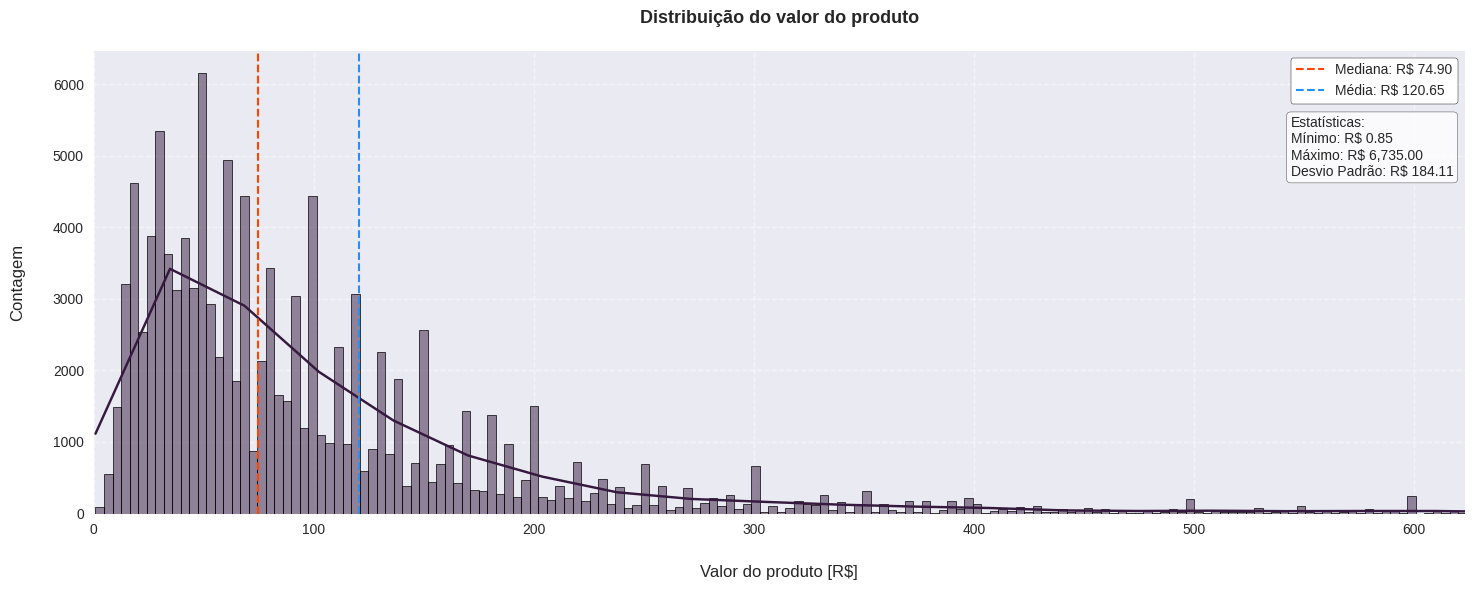

In [409]:
# Criando o gráfico
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("rocket")

ax = sns.histplot(data=df, x='price',
                 kde=True,
                 edgecolor='black', linewidth=0.5,
                 alpha=0.5)

# Criando linha de média e mediana
plt.axvline(x=df['price'].median(), color='orangered', linestyle='--', linewidth=1.5,
            label=f'Mediana: R$ {df["price"].median():.2f}')
plt.axvline(x=df['price'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
            label=f'Média: R$ {df["price"].mean():.2f}')

# Adicionando anotação com estatísticas
stats_text = f"""Estatísticas:
Mínimo: R$ {df['price'].min():,.2f}
Máximo: R$ {df['price'].max():,.2f}
Desvio Padrão: R$ {df['price'].std():,.2f}"""
plt.annotate(stats_text, xy=(0.873, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Legendas e ajuste de layout
plt.title('Distribuição do valor do produto', fontweight='bold', fontsize=13, pad=20)
plt.xlabel('Valor do produto [R$]', fontsize=12, labelpad=20)
plt.ylabel('Contagem', fontsize=12, labelpad=20)

plt.legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))

plt.xlim(0, df['price'].quantile(0.98)) # Para limitar até onde o gráfico vai no eixo x
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Agora vamos visualizar a variável `freight_value`.

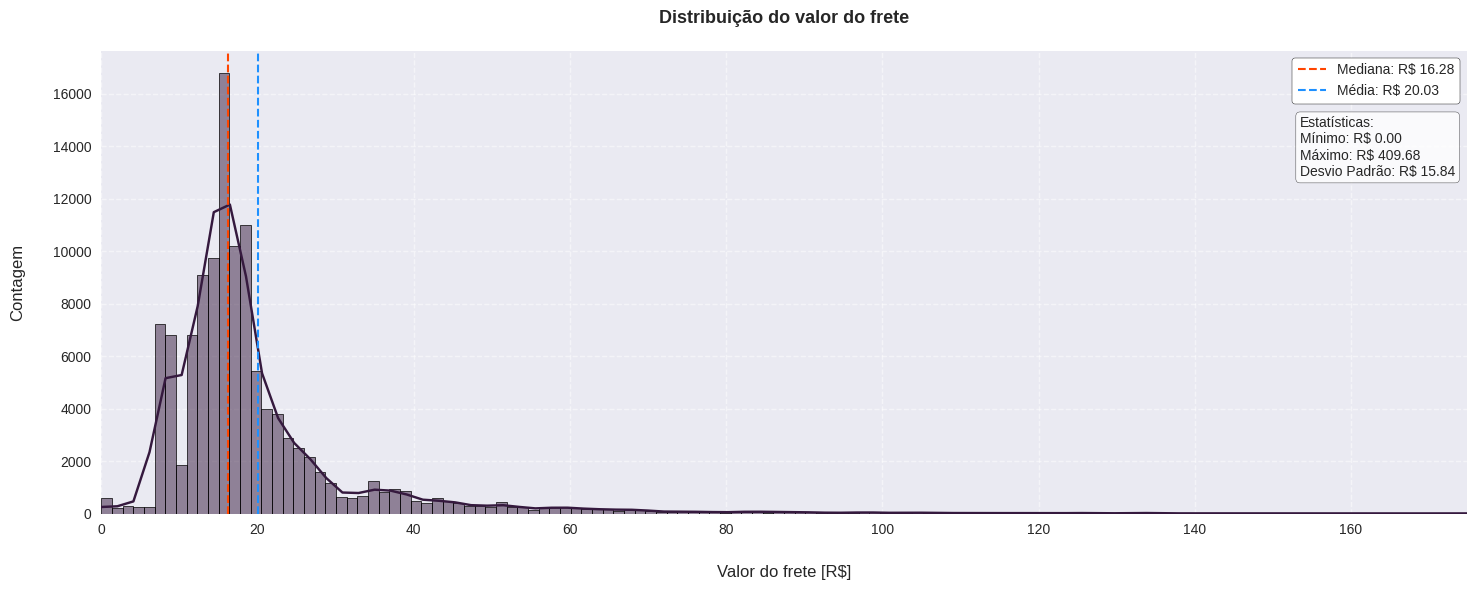

In [405]:
# Criando o gráfico
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("rocket")

ax = sns.histplot(data=df, x='freight_value', bins=300,
                 kde=True,
                 edgecolor='black', linewidth=0.5,
                 alpha=0.5)

# Criando linha de média e mediana
plt.axvline(x=df['freight_value'].median(), color='orangered', linestyle='--', linewidth=1.5,
            label=f'Mediana: R$ {df["freight_value"].median():.2f}')
plt.axvline(x=df['freight_value'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
            label=f'Média: R$ {df["freight_value"].mean():.2f}')

# Adicionando anotação com estatísticas
stats_text = f"""Estatísticas:
Mínimo: R$ {df['freight_value'].min():,.2f}
Máximo: R$ {df['freight_value'].max():,.2f}
Desvio Padrão: R$ {df['freight_value'].std():,.2f}"""
plt.annotate(stats_text, xy=(0.878, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Legendas e ajuste de layout
plt.title('Distribuição do valor do frete', fontweight='bold', fontsize=13, pad=20)
plt.xlabel('Valor do frete [R$]', fontsize=12, labelpad=20)
plt.ylabel('Contagem', fontsize=12, labelpad=20)

plt.legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))

plt.xlim(0, df['freight_value'].quantile(0.999)) # Para limitar até onde o gráfico vai no eixo x
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Agora vamos visualizar a variável `payment_value`.

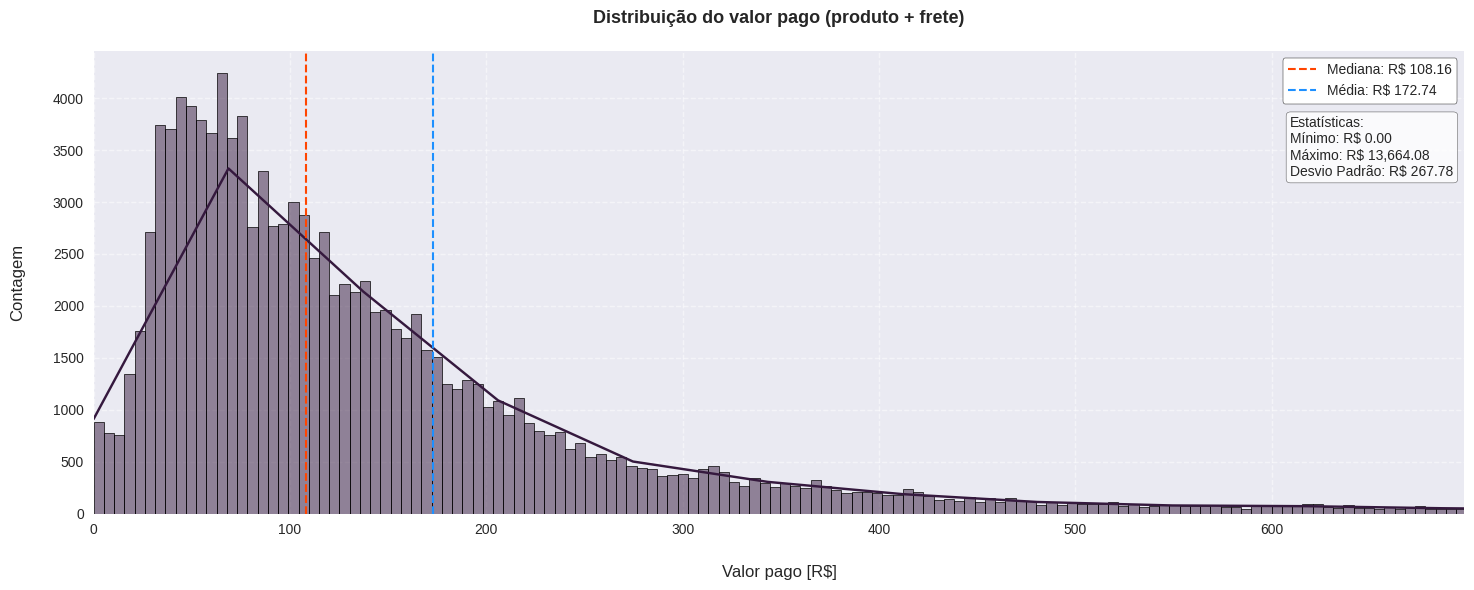

In [399]:
# Criando o gráfico
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("rocket")

ax = sns.histplot(data=df, x='payment_value',
                 kde=True,
                 edgecolor='black', linewidth=0.5,
                 alpha=0.5)

# Criando linha de média e mediana
plt.axvline(x=df['payment_value'].median(), color='orangered', linestyle='--', linewidth=1.5,
            label=f'Mediana: R$ {df["payment_value"].median():.2f}')
plt.axvline(x=df['payment_value'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
            label=f'Média: R$ {df["payment_value"].mean():.2f}')

# Adicionando anotação com estatísticas
stats_text = f"""Estatísticas:
Mínimo: R$ {df['payment_value'].min():,.2f}
Máximo: R$ {df['payment_value'].max():,.2f}
Desvio Padrão: R$ {df['payment_value'].std():,.2f}"""
plt.annotate(stats_text, xy=(0.873, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Legendas e ajuste de layout
plt.title('Distribuição do valor pago (produto + frete)', fontweight='bold', fontsize=13, pad=20)
plt.xlabel('Valor pago [R$]', fontsize=12, labelpad=20)
plt.ylabel('Contagem', fontsize=12, labelpad=20)

plt.legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))

plt.xlim(0, df['payment_value'].quantile(0.97)) # Para limitar até onde o gráfico vai no eixo x
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Agora vamos visualizar a variável `delivery_days`.

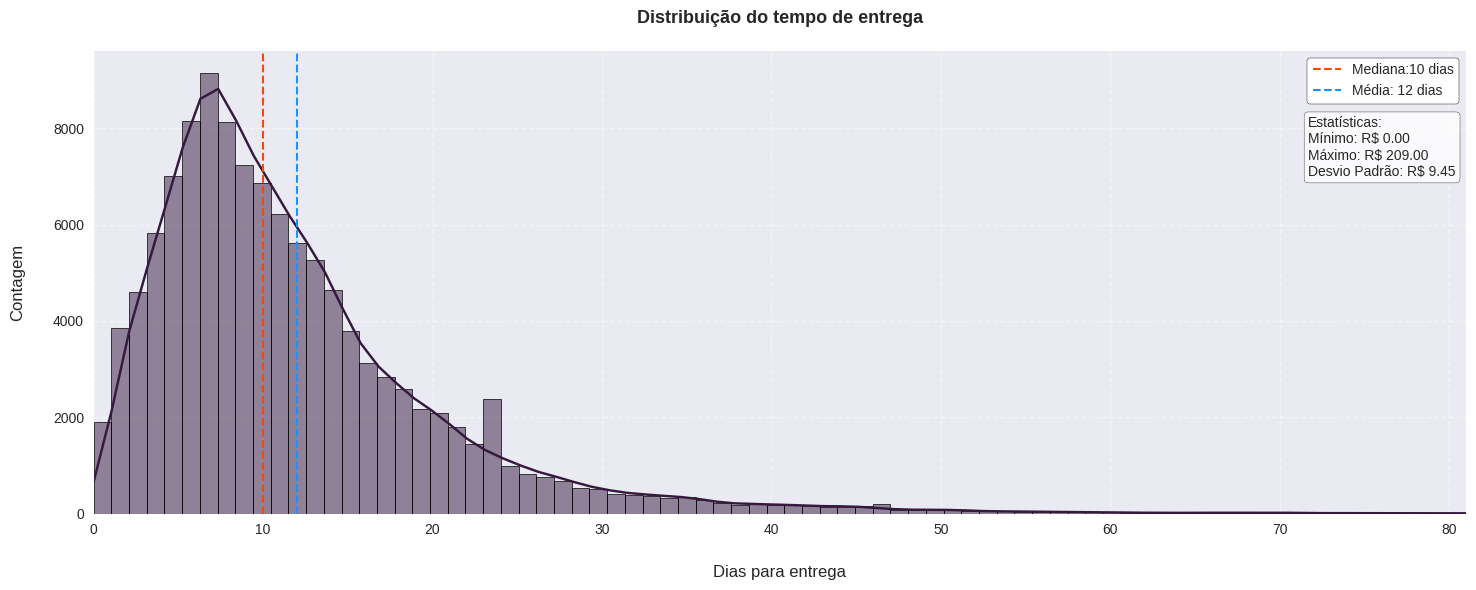

In [396]:
# Criando o gráfico
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("rocket")

ax = sns.histplot(data=df, x='delivery_days', bins=200,
                 kde=True,
                 edgecolor='black', linewidth=0.5,
                 alpha=0.5)

# Criando linha de média e mediana
plt.axvline(x=df['delivery_days'].median(), color='orangered', linestyle='--', linewidth=1.5,
            label=f'Mediana:{df["delivery_days"].median():.0f} dias')
plt.axvline(x=df['delivery_days'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
            label=f'Média: {df["delivery_days"].mean():.0f} dias')

# Adicionando anotação com estatísticas
stats_text = f"""Estatísticas:
Mínimo: R$ {df['delivery_days'].min():,.2f}
Máximo: R$ {df['delivery_days'].max():,.2f}
Desvio Padrão: R$ {df['delivery_days'].std():,.2f}"""
plt.annotate(stats_text, xy=(0.885, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Legendas e ajuste de layout
plt.title('Distribuição do tempo de entrega', fontweight='bold', fontsize=13, pad=20)
plt.xlabel('Dias para entrega', fontsize=12, labelpad=20)
plt.ylabel('Contagem', fontsize=12, labelpad=20)

plt.legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))

plt.xlim(0, df['delivery_days'].quantile(0.999)) # Para limitar até onde o gráfico vai no eixo x
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Analisando os gráficos confirmamos o que suspeitamos com a análise estatística usando o método `describe`: os dados não possuem uma distribuição normal e possuem outliers. Valores extremos muito grandes estão deslocando a concentração dos dados para a esquerda (assimetria a direita).  
Uma transformação logarítmica para reduzir o efeito dos outliers e da assimetria pode ser testada na fase de pré-processamento dos dados.

### 2.6.2 - Boxplot

Com os gráficos de boxplot iremos analisar a relação entre as variáveis preditoras e nossa variável alvo.

Vamos inicar com gráfico de notas por tempo de entrega e verificar se o tempo realmente afeta a satisfação do cliente.

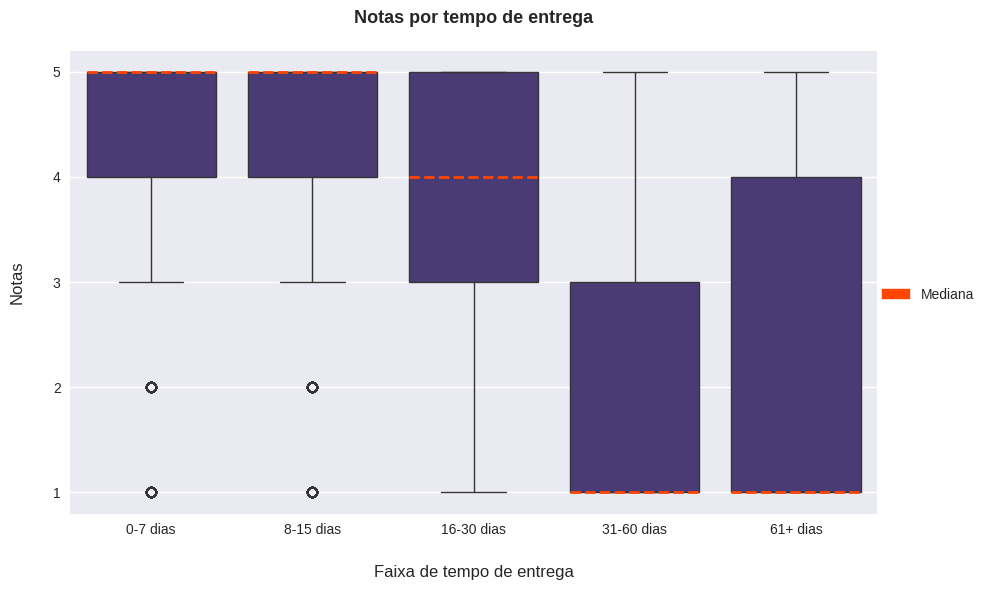

In [385]:
# Criando um df provisório
df_plot = df.copy()

# Criando as faixas de tempo de entrega
bins = [-1, 7, 15, 30, 60, df_plot['delivery_days'].max()]
labels = ['0-7 dias', '8-15 dias', '16-30 dias', '31-60 dias', '61+ dias']

df_plot['delivery_time_range'] = pd.cut(df_plot['delivery_days'], bins=bins, labels=labels, right=True)

#Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

sns.boxplot(
    x='delivery_time_range',
    y='review_score',
    data=df_plot,
    order=labels,
    hue=True,
    legend=False,
    medianprops=dict(color='orangered', linestyle='--', linewidth=2),
    ax=ax
)

# Adicionando a legenda da mediana
median_legend = Patch(color='orangered', label='Mediana')
ax.legend(handles=[median_legend], loc='upper left', bbox_to_anchor=(1.0, 0.5), borderaxespad=0.)

# Legendas e ajuste de layout
ax.set_title('Notas por tempo de entrega', fontweight='bold', fontsize=13, pad=20)
ax.set_xlabel('Faixa de tempo de entrega', fontsize=12, labelpad=20)
ax.set_ylabel('Notas', fontsize=12, labelpad=20)
ax.set_yticks(range(1, 6))
plt.subplots_adjust(right=0.8)
plt.tight_layout()
plt.show()

Nesse gráfico vemos que o tempo de espera da para entrega realmente pode afetar as avaliações, onde entregas de 0 a 15 dias dominam com 4 e 5 estrelas (apesar dos outliers), 16-30 dias já começam a aparecer notas de 1 a 3, porém a mediana se mantém 4 ainda. Já pedidos de entrega acima de 31 dias temos predominancia em notas inferiores a 3, com a mediana em 1 estrela. Confirmamos então nossa hipótese 1.

Agora vamos analisar um gráfico de notas por valor pago no frete.

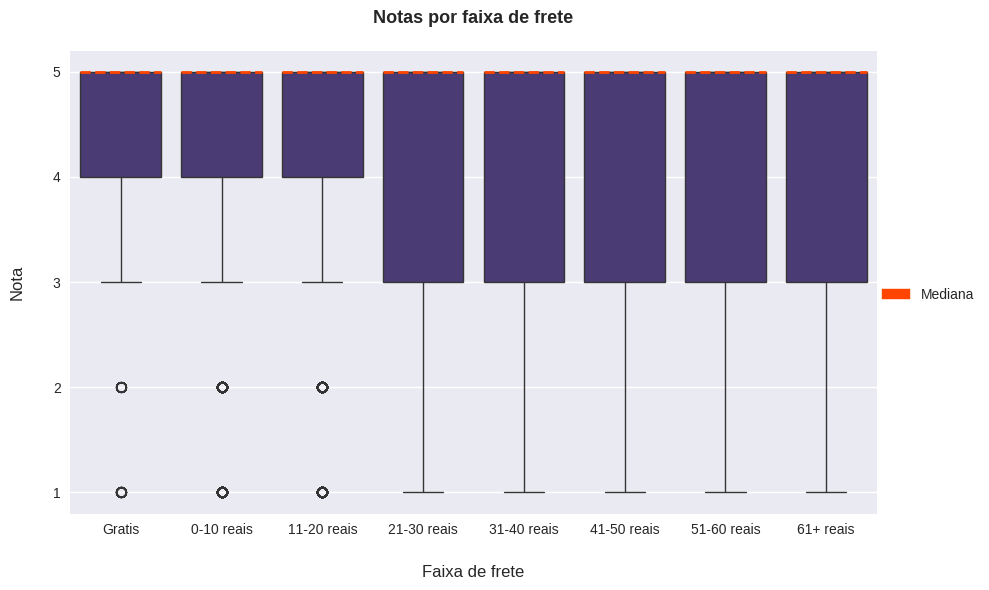

In [384]:
# Criando um df temporário
df_plot = df.copy()

# Criando as faixas de valor de frete
bins = [-1, 0, 10, 20, 30, 40, 50, 60, df_plot['freight_value'].max()]
labels = ['Gratis', '0-10 reais', '11-20 reais', '21-30 reais', '31-40 reais', '41-50 reais', '51-60 reais', '61+ reais']

df_plot['freight_value_range'] = pd.cut(df_plot['freight_value'], bins=bins, labels=labels, right=True)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

sns.boxplot(
    x='freight_value_range',
    y='review_score',
    data=df_plot,
    order=labels,
    medianprops=dict(color='orangered', linestyle='--', linewidth=2),
    ax=ax
)

# Adicionando a legenda da mediana
median_legend = Patch(color='orangered', label='Mediana')
ax.legend(handles=[median_legend], loc='upper left', bbox_to_anchor=(1.0, 0.5), borderaxespad=0.)

# Legendas e ajuste de layout
ax.set_title('Notas por faixa de frete', fontweight='bold', fontsize=13, pad=20)
ax.set_xlabel('Faixa de frete', fontsize=12, labelpad=20)
ax.set_ylabel('Nota', fontsize=12, labelpad=20)
ax.set_yticks(range(1, 6))
plt.subplots_adjust(right=0.8)
plt.tight_layout()
plt.show()

Aqui vemos que mesmo com valores alto de frete, temos uma distruibuição predominante de notas 5 estrelas. Vamos analisar o valor do frete quando comparado ao preço do produto, para avaliarmos se esse comportamento se apresenta de uma forma diferente.

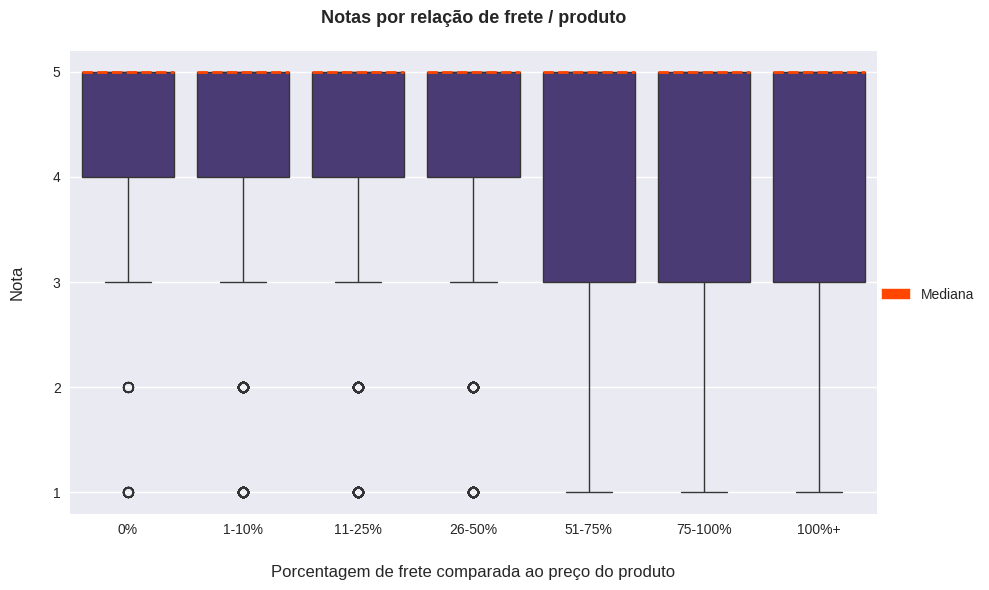

In [383]:
# Criando um df temporário
df_plot = df.copy()

df_plot['freight_percent'] = (df_plot['freight_value'] / df_plot['price']) * 100

# Criando as faixas de tempo de entrega
bins = [-1, 0, 10, 25, 50, 75, 100, 2700]
labels = ['0%', '1-10%', '11-25%', '26-50%', '51-75%', '75-100%', '100%+']

df_plot['freight_value_range'] = pd.cut(df_plot['freight_percent'], bins=bins, labels=labels, right=True)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

sns.boxplot(
    x='freight_value_range',
    y='review_score',
    data=df_plot,
    order=labels,
    medianprops=dict(color='orangered', linestyle='--', linewidth=2),
    ax=ax
)

# Adicionando a legenda da mediana
median_legend = Patch(color='orangered', label='Mediana')
ax.legend(handles=[median_legend], loc='upper left', bbox_to_anchor=(1.0, 0.5), borderaxespad=0.)

ax.set_title('Notas por relação de frete / produto', fontweight='bold', fontsize=13, pad=20)
ax.set_xlabel('Porcentagem de frete comparada ao preço do produto', fontsize=12, labelpad=20)
ax.set_ylabel('Nota', fontsize=12, labelpad=20)
ax.set_yticks(range(1, 6))
plt.tight_layout()
plt.show()

Aqui novamente vemos que, mesmo para produto que tem uma proporção de mais de 100% de frete comparado ao valor do produto, ou seja, pagaram mais de frete do que na mercadoria, temos notas majoritáriamente de 5 estrelas.  
Isso nos confirma que, o valor do frete não necessáriamente influencia as avaliações, descartando nossa hipótese 2.

Vamos verificar agora um gráfico de notas por valor do produto.

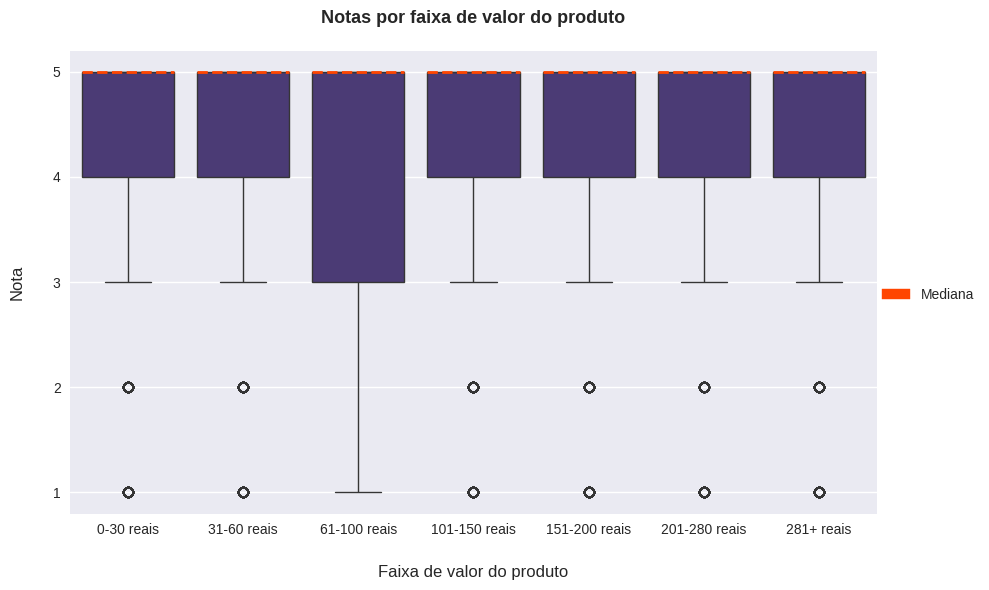

In [382]:
# Criando um df temporário
df_plot = df.copy()

# Criando as faixas de valor pago
bins = [0, 30, 60, 100, 150, 200, 250, df_plot['price'].max()]
labels = ['0-30 reais', '31-60 reais', '61-100 reais', '101-150 reais', '151-200 reais', '201-280 reais', '281+ reais']

df_plot['price_value_range'] = pd.cut(df_plot['price'], bins=bins, labels=labels, right=True)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

sns.boxplot(
    x='price_value_range',
    y='review_score',
    data=df_plot,
    order=labels,
    medianprops=dict(color='orangered', linestyle='--', linewidth=2),
    ax=ax
)

# Adicionando a legenda da mediana
median_legend = Patch(color='orangered', label='Mediana')
ax.legend(handles=[median_legend], loc='upper left', bbox_to_anchor=(1.0, 0.5), borderaxespad=0.)

ax.set_title('Notas por faixa de valor do produto', fontweight='bold', fontsize=13, pad=20)
ax.set_xlabel('Faixa de valor do produto', fontsize=12, labelpad=20)
ax.set_ylabel('Nota', fontsize=12, labelpad=20)
ax.set_yticks(range(1, 6))
plt.tight_layout()
plt.show()

Semelhante a análise acima, vemos que mesmo para produtos com valores muito caros, ainda temos uma predominância de notas altas, não gerando interferência na satisfação do cliente, descartando nossa hipótese 3.

Agora vamos analisar se existe uma propenção a notas mais baixas ou altas para determinadas categorias de produtos visualizando um boxplot de notas por categorias.

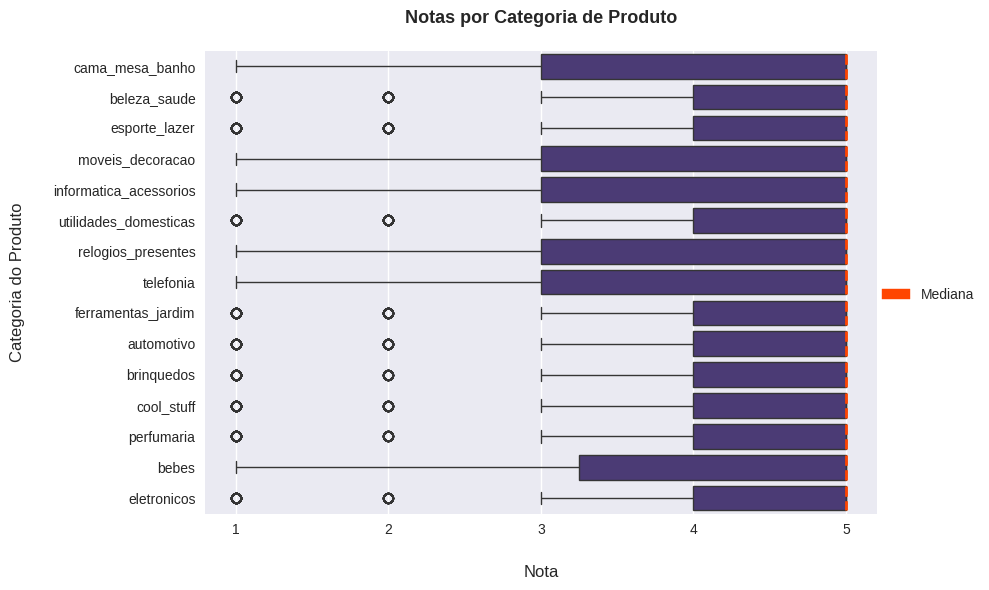

In [378]:
# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

sns.boxplot(
    x='review_score',
    y='product_category_name',
    data=df,
    medianprops=dict(color='orangered', linestyle='--', linewidth=2),
    order=top_15.index,
    ax=ax
)

# Adicionando a legenda da mediana
median_legend = Patch(color='orangered', label='Mediana')
ax.legend(handles=[median_legend], loc='upper left', bbox_to_anchor=(1.0, 0.5), borderaxespad=0.)

ax.set_title('Notas por Categoria de Produto', fontweight='bold', fontsize=13, pad=20)
ax.set_xlabel('Nota', fontsize=12, labelpad=20)
ax.set_ylabel('Categoria do Produto', fontsize=12, labelpad=20)
ax.set_xticks(range(1, 6))
plt.tight_layout()
plt.show()

Aqui vemos que algumas categorias conseguem ter notas mais baixas sem serem consideradas outliers, porém novamente percebemos que os dados estão extremamente desbalanceados, prejudicando nossa análise e possívelmente dificultando o treinamento do futuro modelo de machine learning.

### 2.6.3 - Matriz de correlação

In [59]:
# Matriz de correlação
print("Matriz de Correlação: \n")
df[['review_score',
               'price',
               'freight_value',
               'payment_value',
               'delivery_days']].corr()

Matriz de Correlação: 



,review_score,price,freight_value,payment_value,delivery_days
review_score,1.000000,-0.004492,-0.037013,-0.082343,-0.302750
price,-0.004492,1.000000,0.415938,0.739236,0.061389
freight_value,-0.037013,0.415938,1.000000,0.373762,0.212870
payment_value,-0.082343,0.739236,0.373762,1.000000,0.060449
delivery_days,-0.302750,0.061389,0.212870,0.060449,1.000000


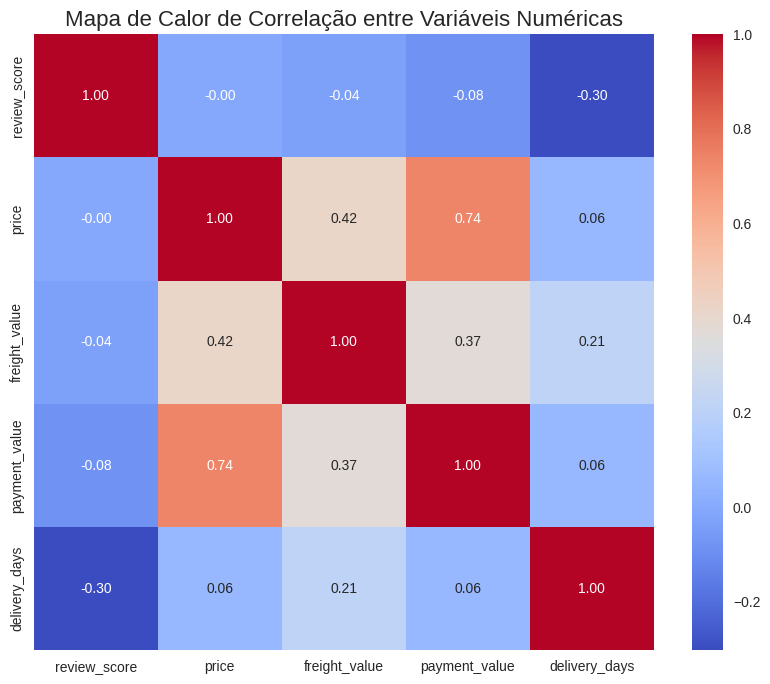

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['review_score',
               'price',
               'freight_value',
               'payment_value',
               'delivery_days']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

Aqui vemos que a váriável preditora que possui a maior relação com nossa variável alvo `review_score` é `delivery_days` (-0.30). Apesar de baixa, é uma correlação negativa, indicando que quanto maior o tempo de demora da entrega, menor é a nota de avaliação do cliente, confirmando nossa primeira hipótese.

Esse é o fator preditivo mais importante entre os analisados, com os outros fatores muito próximos de zero, ou seja, não existe uma relação linear forte entre o preço do produto, o valor do frete ou o valor total pago e a nota da avaliação. Apesar disso, não significa que esses dados são inúteis, indica apenas que não há relação linear, porém a relação entre eles pode ser não-linear.

A relação entre as variáveis preditoras indica que uma alta correlação positiva (0.74) entre `price`e `payment_value`, o que é esperado, e uma leve correlação positiva (0.42) entre `price` e `freight_value`, ou seja, itens mais caros tendem a ter um frete mais caro. Isso pode ser justificado por serem produtos maiores, mais pesados ou que exigem uma logística de transporte mais complexa.

# 3️⃣ Pré-processamento de dados
___

Agora iremos realizar operações de limpeza, tratamento e preparação dos dados. Para isso faremos:

- Limpeza inicial dos dados;
- Tratamento de valores faltantes;
- Remover valores duplicados;
- Feature selection;
- Divisão do conjunto entre treino e teste;
- Técnicas de transformação como padronização e transformações logarítmicas

## 3.1 - Limpeza inicial

Vamos iniciar criando uma cópia do dataframe que estávamos usando para manipular os dados sem que percamos os dados originais.

In [61]:
df_processed = df.copy()

Agora vamos analisar se existem dados inconsistentes em cada coluna.

In [62]:
for i in df_processed.columns:
  display(df[i].apply(type).value_counts())

,count
order_id,
<class 'str'>,119143


,count
order_item_id,
<class 'float'>,119143


,count
order_status,
<class 'str'>,119143


,count
order_purchase_timestamp,
<class 'pandas._libs.tslibs.timestamps.Timestamp'>,119143


,count
order_delivered_customer_date,
<class 'pandas._libs.tslibs.timestamps.Timestamp'>,115722
<class 'pandas._libs.tslibs.nattype.NaTType'>,3421


,count
order_estimated_delivery_date,
<class 'pandas._libs.tslibs.timestamps.Timestamp'>,119143


,count
review_score,
<class 'float'>,119143


,count
customer_state,
<class 'str'>,119143


,count
price,
<class 'float'>,119143


,count
freight_value,
<class 'float'>,119143


,count
product_category_name,
<class 'str'>,116601
<class 'float'>,2542


,count
payment_sequential,
<class 'float'>,119143


,count
payment_value,
<class 'float'>,119143


,count
delivery_time,
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>,115722
<class 'pandas._libs.tslibs.nattype.NaTType'>,3421


,count
delivery_days,
<class 'float'>,119143


Na coluna `product_category_name` temos 2542 registros tipo float, o que não é esperado de uma coluna de nomes de categorias. Vamos verificar esses registros.

In [63]:
df_processed[df_processed['product_category_name'].apply(lambda x: isinstance(x, float))]

,order_id,order_item_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_state,price,freight_value,product_category_name,payment_sequential,payment_value,delivery_time,delivery_days
8,136cce7faa42fdb2cefd53fdc79a6098,1.0,invoiced,2017-04-11 12:22:08,NaT,2017-05-09,2.0,RS,49.90,16.05,NaN,1.0,65.95,NaT,NaN
129,bfe42c22ecbf90bc9f35cf591270b6a7,1.0,delivered,2018-01-27 22:04:34,2018-02-09 20:16:40,2018-02-26,5.0,MG,27.30,15.10,NaN,1.0,42.40,12 days 22:12:06,12.0
221,58ac1947c1a9067b9f416cba6d844a3f,1.0,delivered,2017-09-13 09:18:50,2017-09-21 21:16:17,2017-09-25,5.0,SP,110.00,14.16,NaN,1.0,124.16,8 days 11:57:27,8.0
274,e22b71f6e4a481445ec4527cb4c405f7,1.0,delivered,2017-04-22 13:48:18,2017-05-02 15:45:27,2017-05-11,4.0,MG,22.50,11.74,NaN,1.0,34.24,10 days 01:57:09,10.0
316,a094215e786240fcfefb83d18036a1cd,1.0,delivered,2018-02-08 18:56:45,2018-02-19 13:28:50,2018-02-22,5.0,SP,122.99,9.06,NaN,1.0,132.05,10 days 18:32:05,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118914,aaab15da689073f8f9aa978a390a69d1,NaN,unavailable,2018-01-16 14:27:59,NaT,2018-02-06,1.0,SP,NaN,NaN,NaN,1.0,210.09,NaT,NaN
118946,3a3cddda5a7c27851bd96c3313412840,NaN,canceled,2018-08-31 16:13:44,NaT,2018-10-01,5.0,SP,NaN,NaN,NaN,1.0,63.89,NaT,NaN
119039,a89abace0dcc01eeb267a9660b5ac126,NaN,canceled,2018-09-06 18:45:47,NaT,2018-09-27,4.0,SP,NaN,NaN,NaN,1.0,107.13,NaT,NaN
119040,a69ba794cc7deb415c3e15a0a3877e69,NaN,unavailable,2017-08-23 16:28:04,NaT,2017-09-15,1.0,RJ,NaN,NaN,NaN,1.0,195.91,NaT,NaN


Ou seja, são valores nulos `NaN`, iremos tratá-los em breve.

Vamos verificar os valores únicos de cada coluna categórica.

In [64]:
print('order_status:')
display(list(df_processed['order_status'].unique()))
print('\n\n review_score:')
display(list(df_processed['review_score'].unique()))
print('\n\n customer_state:')
display(list(df_processed['customer_state'].unique()))
print('\n\n product_category_name:')
display(list(df_processed['product_category_name'].unique()))

order_status:


['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']



 review_score:


[np.float64(4.0),
 np.float64(5.0),
 np.float64(2.0),
 np.float64(1.0),
 np.float64(nan),
 np.float64(3.0)]



 customer_state:


['SP',
 'BA',
 'GO',
 'RN',
 'PR',
 'RS',
 'RJ',
 'MG',
 'SC',
 'RR',
 'PE',
 'TO',
 'CE',
 'DF',
 'SE',
 'MT',
 'PB',
 'PA',
 'RO',
 'ES',
 'AP',
 'MS',
 'MA',
 'PI',
 'AL',
 'AC',
 'AM']



 product_category_name:


['utilidades_domesticas',
 'perfumaria',
 'automotivo',
 'pet_shop',
 'papelaria',
 nan,
 'moveis_decoracao',
 'moveis_escritorio',
 'ferramentas_jardim',
 'informatica_acessorios',
 'cama_mesa_banho',
 'brinquedos',
 'construcao_ferramentas_construcao',
 'telefonia',
 'beleza_saude',
 'eletronicos',
 'bebes',
 'cool_stuff',
 'relogios_presentes',
 'climatizacao',
 'esporte_lazer',
 'livros_interesse_geral',
 'eletroportateis',
 'alimentos',
 'malas_acessorios',
 'fashion_underwear_e_moda_praia',
 'artigos_de_natal',
 'fashion_bolsas_e_acessorios',
 'instrumentos_musicais',
 'construcao_ferramentas_iluminacao',
 'livros_tecnicos',
 'construcao_ferramentas_jardim',
 'eletrodomesticos',
 'market_place',
 'agro_industria_e_comercio',
 'artigos_de_festas',
 'casa_conforto',
 'cds_dvds_musicais',
 'industria_comercio_e_negocios',
 'consoles_games',
 'moveis_quarto',
 'construcao_ferramentas_seguranca',
 'telefonia_fixa',
 'bebidas',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'fashi

A princípio os dados estão sem inconsistências, vamos apenas ajeitar a coluna `product_category_name` para ficar visualmente mais agradável.

In [65]:
df_processed['product_category_name'] = (
    df_processed['product_category_name']
    .str.strip()  # remove espaços nas bordas
    .str.capitalize()  # primeira letra em maiúsculo
)

df_processed['product_category_name'] = df_processed['product_category_name'].str.replace('_', ' ').str.title()  # substitui underscore por espaço

df_processed['product_category_name'].head(5)

,product_category_name
0,Utilidades Domesticas
1,Utilidades Domesticas
2,Utilidades Domesticas
3,Perfumaria
4,Automotivo


Vamos limpar os registros de pedidos que não estejam como entregues.

In [66]:
df_processed = df_processed[df_processed['order_status'] == 'delivered']

## 3.2 - Tratamento de valores faltantes

Agora vamos tratar os valores nulos `NaN` e `NaT` do dataset.

In [67]:
print("Valores nulos por coluna:")
df_processed.isna().sum()

Valores nulos por coluna:


,0
order_id,0
order_item_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,8
order_estimated_delivery_date,0
review_score,861
customer_state,0
price,0
freight_value,0


Para colunas categóricas como `product_category_name` podemos substituir os nulos por uma categoria 'desconhecida'.  

Já para a coluna `delivery_days` podemos deletar os registros, já que se tratam apenas de 8 linhas. O mesmo vale para a coluna `payment_value`.  

Também iremos deletar os registros nulos da variável alvo `review_score`, já que ela é a principal coluna, não sendo adequado fazermos previsões para imputar dados nela. Além disso, são apenas 861 registos nulos nessa coluna, quantidade pequena quando comparada ao total de registros do dataset.  

Para os valores nulos de `payment_value` iremos substituir pela soma de `price` e `freight_value`.

Os nulos de `payment_sequential` serão subsituidos pelo valor 1.

In [68]:
# Substituindo nulos por categoria desconhecida
df_processed['product_category_name'].fillna('Desconhecida', inplace=True)

# Removemos nulos das colunas de notas e dias para entrega
df_processed.dropna(subset=['review_score'], inplace=True)
df_processed.dropna(subset=['delivery_days'], inplace=True)

# Substituindo nulos pela soma de preço do produto + frete
df_processed['payment_value'].fillna(df_processed['price'] + df_processed['freight_value'], inplace=True)

# Substituindo nulos por 1
df_processed['payment_sequential'].fillna(1, inplace=True)

In [69]:
print("Valores nulos por coluna:")
df_processed.isna().sum()

Valores nulos por coluna:


,0
order_id,0
order_item_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
review_score,0
customer_state,0
price,0
freight_value,0


## 3.3 - Registros duplicados

In [70]:
print(f"Total de registros duplicados: {df_processed.duplicated().sum()}")
print(f"Total de registros: {len(df_processed)}")

Total de registros duplicados: 411
Total de registros: 114854


Como já havíamos analisado na etapa de Exploração inicial dos dados, existem valores duplicados que se tratam de pedidos com mais de uma avaliação. Como nos restou apenas 411 vamos remover esses registros (antes eram 421, mas provavelmente os 10 faltantes foram removidos durante a etapa de remoção de valores nulos).

In [71]:
df_processed = df_processed.drop_duplicates()

In [72]:
print(f"Total de registros duplicados: {df_processed.duplicated().sum()}")
print(f"Total de registros: {len(df_processed)}")

Total de registros duplicados: 0
Total de registros: 114443


## 3.4 - Transformação logarítmica

Vamos aplicar uma transformação logarítmica para reduzir o efeito dos outliers e a assimetria.

A transformação logarítmica (np.log1p()) "comprime" os valores altos e "expande" os valores baixos, reduzindo drasticamente a influência dos valores extremos sem apagar a informação. Ela é muito eficaz em reduzir assimetria à direita, que é o nosso caso.

In [73]:
# Usamos np.log1p para calcular log(1+x), o que evita erros com valores iguais a 0.
df_processed['price_log'] = np.log1p(df_processed['price'])
df_processed['freight_value_log'] = np.log1p(df_processed['freight_value'])
df_processed['delivery_days_log'] = np.log1p(df_processed['delivery_days'])

### 3.4.1 - Visualizações de distruição após transformação logarítmica

Vamos visualizar como ficaram as distribuições das nossas variáveis agora.

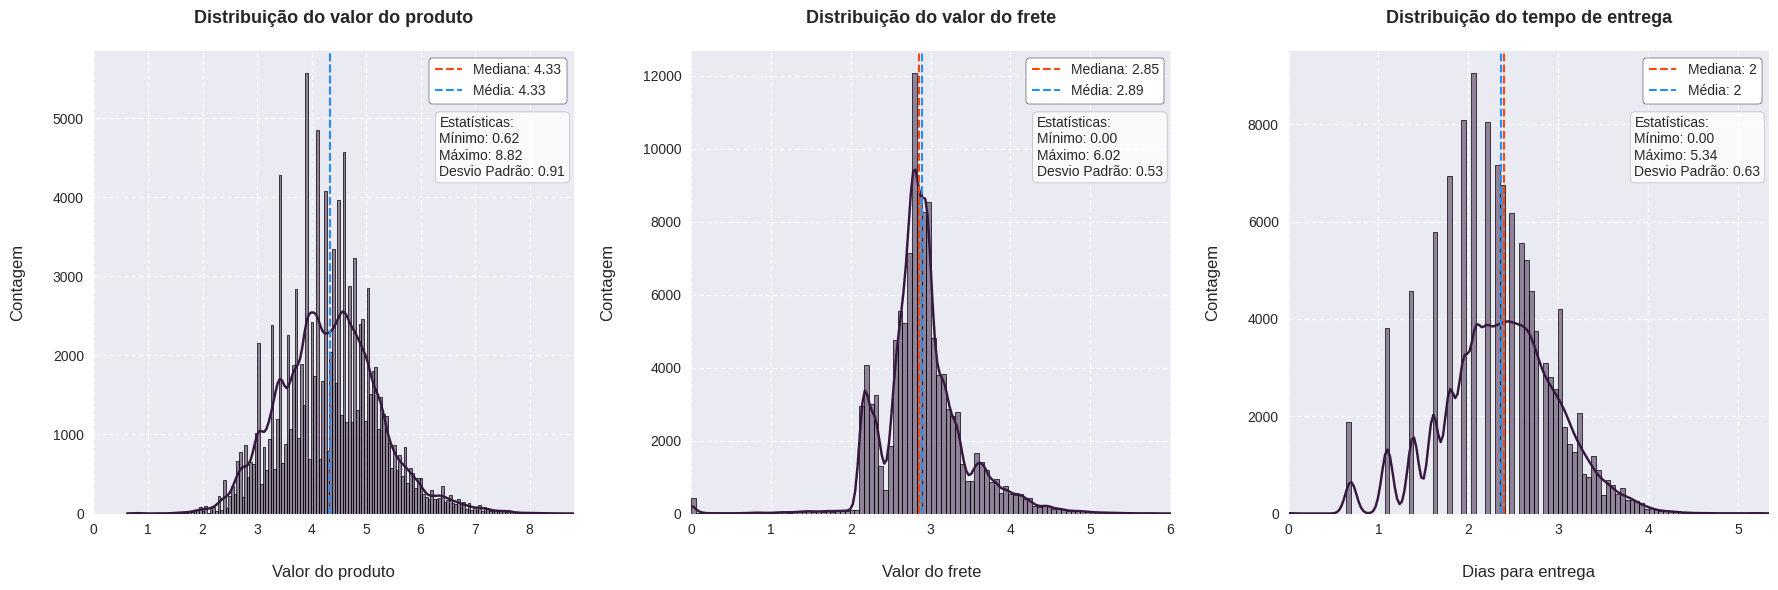

In [452]:
# Definindo o layout com 3 gráficos (1 linha e 3 colunas)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Estilo e paleta
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("rocket")

# Gráfico 1: Distribuição do valor do produto
sns.histplot(data=df_processed, x='price_log', kde=True,
             edgecolor='black', linewidth=0.5, alpha=0.5, ax=axs[0])

axs[0].axvline(x=df_processed['price_log'].median(), color='orangered', linestyle='--', linewidth=1.5,
               label=f'Mediana: {df_processed["price_log"].median():.2f}')
axs[0].axvline(x=df_processed['price_log'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
               label=f'Média: {df_processed["price_log"].mean():.2f}')

stats_text = f"""Estatísticas:
Mínimo: {df_processed['price_log'].min():,.2f}
Máximo: {df_processed['price_log'].max():,.2f}
Desvio Padrão: {df_processed['price_log'].std():,.2f}"""
axs[0].annotate(stats_text, xy=(0.72, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

axs[0].set_title('Distribuição do valor do produto', fontweight='bold', fontsize=13, pad=20)
axs[0].set_xlabel('Valor do produto', fontsize=12, labelpad=20)
axs[0].set_ylabel('Contagem', fontsize=12, labelpad=20)
axs[0].legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].set_xlim(0, df_processed['price_log'].quantile(1))

# Gráfico 2: Distribuição do valor do frete
sns.histplot(data=df_processed, x='freight_value_log', bins=100, kde=True,
             edgecolor='black', linewidth=0.5, alpha=0.5, ax=axs[1])

axs[1].axvline(x=df_processed['freight_value_log'].median(), color='orangered', linestyle='--', linewidth=1.5,
               label=f'Mediana: {df_processed["freight_value_log"].median():.2f}')
axs[1].axvline(x=df_processed['freight_value_log'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
               label=f'Média: {df_processed["freight_value_log"].mean():.2f}')

stats_text = f"""Estatísticas:
Mínimo: {df_processed['freight_value_log'].min():,.2f}
Máximo: {df_processed['freight_value_log'].max():,.2f}
Desvio Padrão: {df_processed['freight_value_log'].std():,.2f}"""
axs[1].annotate(stats_text, xy=(0.72, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

axs[1].set_title('Distribuição do valor do frete', fontweight='bold', fontsize=13, pad=20)
axs[1].set_xlabel('Valor do frete', fontsize=12, labelpad=20)
axs[1].set_ylabel('Contagem', fontsize=12, labelpad=20)
axs[1].legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].set_xlim(0, df_processed['freight_value_log'].quantile(1))

# Gráfico 3: Distribuição do tempo de entrega
sns.histplot(data=df_processed, x='delivery_days_log', bins=100, kde=True,
             edgecolor='black', linewidth=0.5, alpha=0.5, ax=axs[2])

axs[2].axvline(x=df_processed['delivery_days_log'].median(), color='orangered', linestyle='--', linewidth=1.5,
               label=f'Mediana: {df_processed["delivery_days_log"].median():.0f}')
axs[2].axvline(x=df_processed['delivery_days_log'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
               label=f'Média: {df_processed["delivery_days_log"].mean():.0f}')

stats_text = f"""Estatísticas:
Mínimo: {df_processed['delivery_days_log'].min():,.2f}
Máximo: {df_processed['delivery_days_log'].max():,.2f}
Desvio Padrão: {df_processed['delivery_days_log'].std():,.2f}"""
axs[2].annotate(stats_text, xy=(0.72, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

axs[2].set_title('Distribuição do tempo de entrega', fontweight='bold', fontsize=13, pad=20)
axs[2].set_xlabel('Dias para entrega', fontsize=12, labelpad=20)
axs[2].set_ylabel('Contagem', fontsize=12, labelpad=20)
axs[2].legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))
axs[2].grid(True, linestyle='--', alpha=0.7)
axs[2].set_xlim(0, df_processed['delivery_days_log'].quantile(1))

# Ajustando layout
plt.tight_layout()
plt.show()

Como esperado, a transformação logarítmica removeu a assimetria da distribuição dos dados, deixando-a com um formato similar a de um sino, ou seja, mais próxima de uma distruibuição normal, facilitando o treinamento de um futuro modelo.

## 3.5 - Feature selection

Aqui definiremos exatamente o que será X (features) e y (target) e descartaremos o resto.

In [75]:
# Criar função para separar a variável alvo com 3 classes
def categorizar_satisfacao(nota):
    if nota <= 2:
        return 0  # Classe para 'Insatisfeito'
    elif nota == 3:
        return 1  # Classe para 'Indiferente'
    else: # Notas 4 e 5
        return 2  # Classe para 'Satisfeito'

# Aplicar a função para criar o target 'y'
df_processed['customer_satisfaction'] = df_processed['review_score'].apply(categorizar_satisfacao)

y = df_processed['customer_satisfaction']

# Selecionar as colunas que usaremos como features 'X'
selected_features = [
    'price_log',
    'freight_value_log',
    'delivery_days_log',
    'product_category_name'
    ]

X = df_processed[selected_features]

In [461]:
# Verificar a distribuição das classes
print("\nDistribuição percentual das classes:")
display((y.value_counts(normalize=True)*100).round(2).astype(str) + '%')

print("\nContagem por classe:")
display(y.value_counts())
print("\nLegenda:\n  2 = Satisfeito\n  1 = Indiferente\n  0 = Insatisfeito")


Distribuição percentual das classes:


,proportion
customer_satisfaction,
2,76.76%
0,14.82%
1,8.41%



Contagem por classe:


,count
customer_satisfaction,
2,87851
0,16964
1,9628



Legenda:
  2 = Satisfeito
  1 = Indiferente
  0 = Insatisfeito


## 3.6 - Holdout

Agora vamos dividir os dados em conjuntos de treino e teste.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% dos dados para teste
    random_state=42,  # garante reprodutibilidade
    stratify=y        # mantém a proporção das classes
    )

In [118]:
# Tamanho dos conjuntos de treino e teste:

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (91554, 4)
Dimensões de X_test: (22889, 4)
Dimensões de y_train: (91554,)
Dimensões de y_test: (22889,)


In [460]:
# Proporção da variável alvo nos conjunto de treino e teste

print("Distribuição das classes no conjunto de treino (y_train):")
display((y_train.value_counts(normalize=True)*100).round(2).astype(str) + '%')
print("\nDistribuição das classes no conjunto de teste (y_test):")
display((y_test.value_counts(normalize=True)*100).round(2).astype(str) + '%')

Distribuição das classes no conjunto de treino (y_train):


,proportion
customer_satisfaction,
2,76.76%
0,14.82%
1,8.41%



Distribuição das classes no conjunto de teste (y_test):


,proportion
customer_satisfaction,
2,76.76%
0,14.82%
1,8.41%


Aqui vemos que a estratificação dos dados ocorreu conforme esperado, ou seja, proporção de cada uma das três classes ('Satisfeito', 'Indiferente' e 'Insatisfeito') é a mesma tanto no conjunto de treino quanto no de teste.

## 3.7 - Transformação dos dados

Vamos transformar os dados aplicando a técnica de padronização, para que os dados fiquem na mesma escala, com média 0 e desvio padrão 1. Isso é essencial para o treinamento do futuro modelo pois muito modelos de machine learning são sensiveis a diferença de escala dos dados, lidando melhor com eles quando estão escalonados. Essa técnica foi escolhida no lugar da normalização por conta das features `price`, `freight_value` e `delivery_days` possuirem muitos outliers extremos.

A normalização iria "espremer" os dados em um intervalo muito pequeno perto de 0 por conta dos valores máximos muito altos, perdendo sua variação relativa. Usando a padronização garantimos que esses outliers não distorçam completamente a escala dos dados, resultando em um modelo mais estável e confiável.

Mesmo que os dados estejam mais bem distribuídos devido a transformação logarítmica, os valores que eram outliers ainda são os valores extremos (mínimos e máximos) na nova distribuição, portanto a padronização continua sendo importante.

Para `product_category_name`, a única feature categórica, usaremos One-Hot Encoding, transformando os dados em vetores numéricos. Usamos essa técnica no lugar de Label Encoding pois os dados não possuem uma relação de ordem entre eles, o que confudiria o treinamento do modelo.

In [80]:
# Identificar colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# Criar um 'pré-processador', aplicando a transformação correta para cada tipo de coluna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Transformador para colunas numéricas: Padronização
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Transformador para colunas categóricas: One-Hot Encoding
    ],
    remainder='passthrough' # Deixa outras colunas intactas, se houver
)

In [81]:
print(f"Features numéricas: {numerical_features}")
print(f"Features categóricas: {categorical_features}")

Features numéricas: ['price_log', 'freight_value_log', 'delivery_days_log']
Features categóricas: ['product_category_name']


In [82]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape de X_train_processed após transformação: {X_train_processed.shape}")
print(f"Shape de X_test_processed após transformação: {X_test_processed.shape}")

Shape de X_train_processed após transformação: (91554, 76)
Shape de X_test_processed após transformação: (22889, 76)


Usamos .fit_transform() para os dados de treino pois esse método não só transforma os dados, mas ele também aprende de quais dados serão "usados" as médias e desvios padrão para o StandardScaler, por exemplo, e quais são todas as categorias possíveis para o OneHotEncoder.

Já o método .transform() é usado no conjunto de teste pois ele apenas transforma os parâmetros, que no caso já foram aprendidos no conjunto de treino.

Esse procedimento é o ideal para evitar vazamento de dados (data leakage) e garantir que o modelo seja testado em condições novas.

### 3.7.1 - Visualização dos dados padronizados

In [83]:
# Isolar os dados numéricos padronizados do resultado do ColumnTransformer

# Converter os dados transformados em uma matriz densa antes do fatiamento
X_train_processed_dense = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed

# As primeiras colunas de X_train_processed são as numéricas
scaled_numerical_data = X_train_processed_dense[:, :len(numerical_features)]

# Criar um DataFrame com estes dados para facilitar a plotagem com Seaborn
df_scaled = pd.DataFrame(scaled_numerical_data, columns=numerical_features)

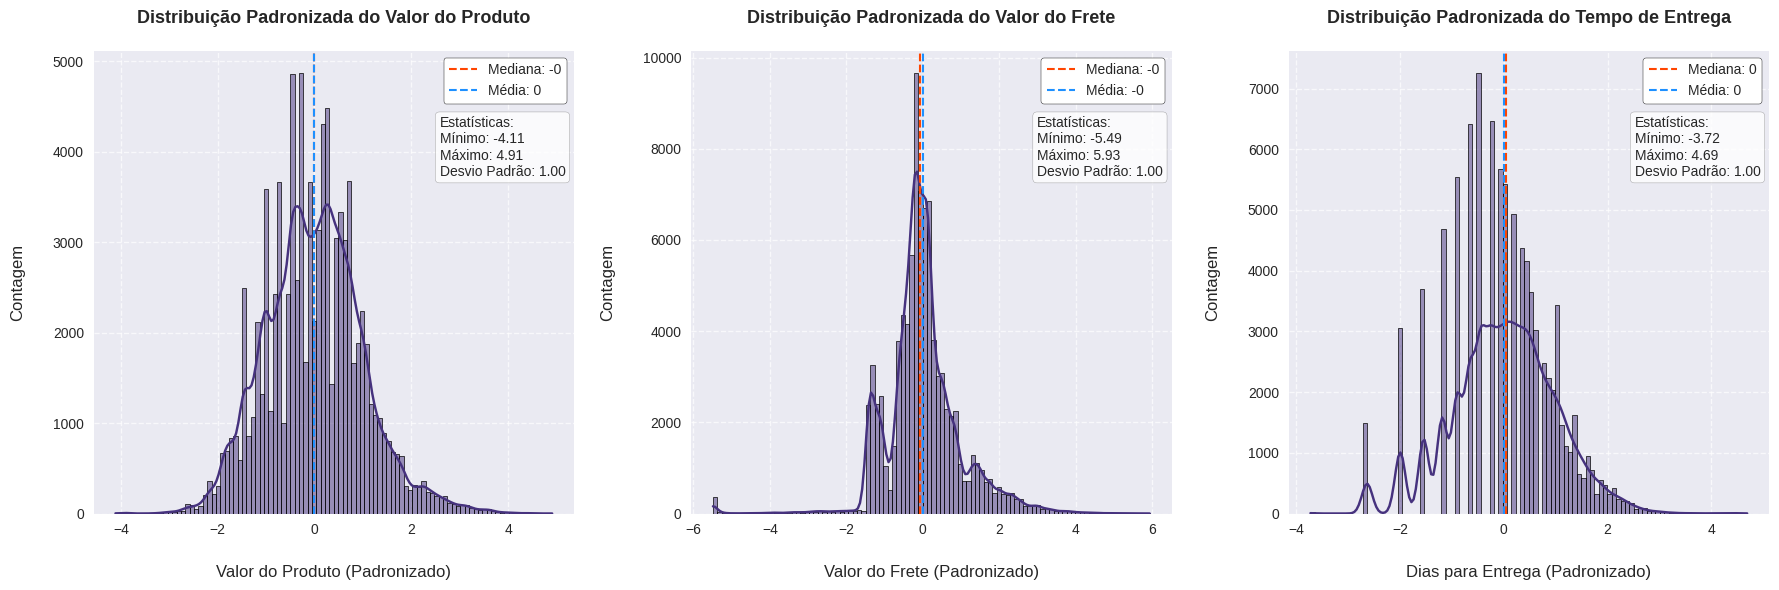

In [459]:
# Definindo o layout com 3 gráficos (1 linha e 3 colunas)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Estilo e paleta
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Gráfico 1: Distribuição do valor do produto padronizado
sns.histplot(data=df_scaled, x='price_log', bins=100, kde=True,
             edgecolor='black', linewidth=0.5, alpha=0.5, ax=axs[0])
axs[0].axvline(x=df_scaled['price_log'].median(), color='orangered', linestyle='--', linewidth=1.5,
               label=f'Mediana: {df_scaled["price_log"].median():.0f}')
axs[0].axvline(x=df_scaled['price_log'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
               label=f'Média: {df_scaled["price_log"].mean():.0f}')

stats_text = f"""Estatísticas:
Mínimo: {df_scaled['price_log'].min():,.2f}
Máximo: {df_scaled['price_log'].max():,.2f}
Desvio Padrão: {df_scaled['price_log'].std():,.2f}"""
axs[0].annotate(stats_text, xy=(0.72, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

axs[0].set_title('Distribuição Padronizada do Valor do Produto', fontweight='bold', fontsize=13, pad=20)
axs[0].set_xlabel('Valor do Produto (Padronizado)', fontsize=12, labelpad=20)
axs[0].set_ylabel('Contagem', fontsize=12, labelpad=20)
axs[0].legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))
axs[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico 2: Distribuição do valor do frete padronizado
sns.histplot(data=df_scaled, x='freight_value_log', bins=100, kde=True,
             edgecolor='black', linewidth=0.5, alpha=0.5, ax=axs[1])
axs[1].axvline(x=df_scaled['freight_value_log'].median(), color='orangered', linestyle='--', linewidth=1.5,
               label=f'Mediana: {df_scaled["freight_value_log"].median():.0f}')
axs[1].axvline(x=df_scaled['freight_value_log'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
               label=f'Média: {df_scaled["freight_value_log"].mean():.0f}')

stats_text = f"""Estatísticas:
Mínimo: {df_scaled['freight_value_log'].min():,.2f}
Máximo: {df_scaled['freight_value_log'].max():,.2f}
Desvio Padrão: {df_scaled['freight_value_log'].std():,.2f}"""
axs[1].annotate(stats_text, xy=(0.72, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

axs[1].set_title('Distribuição Padronizada do Valor do Frete', fontweight='bold', fontsize=13, pad=20)
axs[1].set_xlabel('Valor do Frete (Padronizado)', fontsize=12, labelpad=20)
axs[1].set_ylabel('Contagem', fontsize=12, labelpad=20)
axs[1].legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))
axs[1].grid(True, linestyle='--', alpha=0.7)

# Gráfico 3: Distribuição do tempo de entrega padronizado
sns.histplot(data=df_scaled, x='delivery_days_log', bins=100, kde=True,
             edgecolor='black', linewidth=0.5, alpha=0.5, ax=axs[2])
axs[2].axvline(x=df_scaled['delivery_days_log'].median(), color='orangered', linestyle='--', linewidth=1.5,
               label=f'Mediana: {df_scaled["delivery_days_log"].median():.0f}')
axs[2].axvline(x=df_scaled['delivery_days_log'].mean(), color='dodgerblue', linestyle='--', linewidth=1.5,
               label=f'Média: {df_scaled["delivery_days_log"].mean():.0f}')

stats_text = f"""Estatísticas:
Mínimo: {df_scaled['delivery_days_log'].min():,.2f}
Máximo: {df_scaled['delivery_days_log'].max():,.2f}
Desvio Padrão: {df_scaled['delivery_days_log'].std():,.2f}"""
axs[2].annotate(stats_text, xy=(0.72, 0.73), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

axs[2].set_title('Distribuição Padronizada do Tempo de Entrega', fontweight='bold', fontsize=13, pad=20)
axs[2].set_xlabel('Dias para Entrega (Padronizado)', fontsize=12, labelpad=20)
axs[2].set_ylabel('Contagem', fontsize=12, labelpad=20)
axs[2].legend(loc='upper right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   facecolor='white',
                   bbox_to_anchor=(1, 1))
axs[2].grid(True, linestyle='--', alpha=0.7)

# Ajustando layout
plt.tight_layout()
plt.show()

In [85]:
_ = pd.concat([df_scaled.describe().loc[['std', 'mean', 'min', 'max', '50%']].round(2).T,
           df_scaled.mode().round(2).T],
           axis=1)

_.columns = ['Desvio Padrão', 'Média', 'Mínimo', 'Máximo', 'Mediana', 'Moda']
_

,Desvio Padrão,Média,Mínimo,Máximo,Mediana,Moda
price_log,1.0,0.0,-4.11,4.91,-0.01,-0.25
freight_value_log,1.0,-0.0,-5.49,5.93,-0.08,-0.21
delivery_days_log,1.0,0.0,-3.72,4.69,0.05,-0.45


Com o método `describe` confirmamos que a padronização dos dados funcionou perfeitamente, colocando os dados de todas as colunas com média 0 e desvio padrão 1.  

Com a análise gráfica também podemos confirmar que a padronização funcionou vendo que os gráficos ficaram com seu centro no ponto 0 do eixo x, coincidindo com a linha tracejada da média. Além disso, os valores estão em uma escala bem próxima de -3 e 3, o que é normalmente esperado após uma padronização.  

Em uma distribuição normal perfeita teríamos esse centro coincidindo com o pico do gráfico de sino, e os valores de mediana e moda também iguais a zero. Apesar disso, após a transformação logarítmica e padronização os dados estão mais bem distribuidos e próximos de uma distribuição normal perfeita do que anteriormente.

## 3.8 - Balanceamento das classes minoritárias

Como mencionamos durante nossa análise, nossos dados são extremamente desbalanceados com amostras notas 5, portanto iremos aplicar a técnica `SMOTE` (Synthetic Minority Oversampling Technique) para ampliar sintéticamente os dados que possuem as classes 'Insatisfeito' (notas 1 e 2) e 'Indiferente' (nota 3), balanceando assim os dados do conjunto de treino. Essa técnica não pode ser aplicada conjunto de teste para não haver vazamento dos dados (data leakage).

In [86]:
# Aplicar o SMOTE apenas nos dados de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

In [87]:
print("Distribuição das classes do conjunto de treino antes do SMOTE:")
display((y_train.value_counts(normalize=True)* 100).round(2).astype(str) + '%')

print("\nDistribuição das classes do conjunto de treino depois do SMOTE:")
display((y_train_balanced.value_counts(normalize=True)* 100).round(2).astype(str) + '%')

print(f"\nNúmero de registros do treino antes do SMOTE: {X_train_processed.shape[0]}")
print(f"Número de registros do treino depois do SMOTE: {X_train_balanced.shape[0]}")

Distribuição das classes do conjunto de treino antes do SMOTE:


,proportion
customer_satisfaction,
2,76.76%
0,14.82%
1,8.41%



Distribuição das classes do conjunto de treino depois do SMOTE:


,proportion
customer_satisfaction,
2,33.33%
0,33.33%
1,33.33%



Número de registros do treino antes do SMOTE: 91554
Número de registros do treino depois do SMOTE: 210843


Aqui vemos que anteriormente tinhamos 91.554 registros, sendo 76.76% deles da categoria 2 (Satisfeito). A técnica SMOTE aumentou o número de registros das classes 0 e 1 até que o número de exemplos em cada uma delas se igualasse ao da classe 2, ficando com 33.33% de amostrar para cada classe, totalizando 210.843 registros.

Vale lembrar que a técnica SMOTE não cria os dados apenas fazendo cópias dos dados já existentes. Um novo cliente "Insatisfeito" é criado com base nas características de outros clientes "Insatisfeitos" reais, buscando os 'k' vizinhos mais próximos dele e interpolando entre os dois.

# 4️⃣ Conclusão
___

O objetivo central deste projeto foi realizar uma análise exploratória e um pré-processamento completo em um dataset de e-commerce da Olist, com o intuito de preparar os dados para a futura tarefa de prever a satisfação do cliente, separados em três categorias ('Insatisfeito', 'Indiferente' e 'Satisfeito'), através do treinamento de algum modelo de machine learning.

Durante a análise exploratória dos dados pudemos evidenciar algumas características do dataset, como:

1. Desbalanceamento das classes, com a extrema maioria das avaliações sendo positivas (notas 4 e 5);
2. Forte assimetria à direita das variáveis numéricas, como preço dos produtos e valor do frete, indicando a presença de outliers;
3. A confirmação visual e estatística de que o tempo de entrega é um fator com forte correlação negativa com a satisfação do cliente, confirmando nossa hipótese 1 do começo do projeto.

Durante o pré-processamento realizamos algumas etapas, como:

1. Engenharia de atributos, para criar uma variável mais informativa relacionada ao tempo de entrega dos pedidos. Essa etapa, apesar de fazer parte de uma preparação dos dados, foi realizada antes mesmo de iniciarmos nossas análises, pois já previmos que seria uma variável interessante de estar presente nas análises estatísticas;
2. Aplicamos transformação logarítmica nas features assimétricas, normalizando a forma de suas distribuições e mitigando os efeitos dos outliers, tornando-as mais adequadas para algoritmos de machine learning;
3. Transformamos os dados usando One-Hot Encoding para as features categóricas e padronizamos com StandardScaler as variáveis numéricas para que todas ficassem na mesma escala. Todas essas transformações foram aplicadas da forma correta após a divisão dos dados em conjuntos de treino e teste e sempre se atentando para não ocorrer data leakage;
4. Aplicamos a técnica SMOTE no conjunto de treino, aumentando artificialmente a quantidade de registros das classes minoritárias, gerando um conjunto de dados de treinamento perfeitamente balanceado, evitando que o modelo treinado venha a sofrer overfitting para a classe 'Satisfeito'.
5. Além de todo o tratamento de valores nulos, duplicados e inconsistentes.

## Possíveis melhorias

Poderíamos adicionar algumas hipóteses iniciais, como:

1. Considerar que os atrasos no frete podem estar ligados a processos de logísticas complicados. Com essa ideia poderíamos verificar alguma relação entre o peso e dimensões do produto com o tempo de entrega, partindo do pressuposto que produtos grandes ou pesados podem ser mais difíceis de manusear durante o transporte.

2. Outra hipótese poderia ser sobre a avaliação do cliente estar vinculada a utilização de um cupom de desconto ou não. A ideia é semelhante à hipótese 4: no caso de receber um desconto, o cliente pode ter uma percepção de "bom negócio", tornando-o mais tolerante a pequenas falhas no processo, resultando em avaliações mais altas.

## Considerações finais

Algumas hipóteses iniciais que tivemos no início do projeto foram descartadas ao analisarmos as estatísticas e plotarmos alguns gráficos dos dados, porém é importante perceber que obtivemos essas respostas devido ao desbalanceamento dos dados. Talvez se o dataset não estivesse não enviesado para notas 5 estrelas, teríamos uma conclusão diferente na análise.

Vale ressaltar que é válido realizar o treinamento do modelo tanto com os dados balanceados (X_train_balanced, y_train_balanced) quanto com os dados desbalanceados (X_train_processed, y_train), para validarmos a eficácia da utlização do SMOTE.

Dessa forma, avalio que este projeto executou com sucesso todo o ciclo de vida da preparação de dados, entregando as análises necessárias e preparando os dados para a etapa seguinte, que seria treinar e avaliar diferentes algoritmos de classificação para, enfim, extrair valor preditivo dos dados.